## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To get classification metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
)

'''
# to build a linear regression model
from sklearn.linear_model import LinearRegression

# To get regression metric scores
from sklearn.metrics import (
  mean_absolute_error,
  mean_squared_error,
  r2_score
)
'''

# to suppress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")


## Loading the dataset

In [ ]:
# uncomment the following lines if Google Colab is being used
from google.colab import drive
drive.mount('/content/drive')

# loading data into a pandas dataframe
loan = pd.read_csv("/content/drive/My Drive/1Python AI Course/UTA/Course 2: Basic ML Models/Module 2 - Decision Trees/Loan_Modelling.csv")

# copying data to another variable to avoid any changes to original data
data = loan.copy()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Overview

* Observations
* Sanity checks

In [ ]:
# 1. View the first and last 5 rows of the dataset.
data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
data.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [ ]:
# 2. Understand the shape of the dataset.
print(data.shape)

# 3. Check the data types of the columns for the dataset
print(data.info())

(5000, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB
None


#### Observations: This dataset contains 5,000 rows and 14 columns. There are 13 columns that are integers and 1 column that is a float.


In [ ]:
# 4. Checking the Statistical Summary
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


#### Observations:
* **Age:** The Average age of customers is 45 years, it has a wide range from 23 to 67 years. The distribution of Age is fairly symmetrical because the mean = median.


* **Experience:**
    * The Average experience is 20 years, it has a wide range from 0 to 43 years. The distribution of Experience is fairly symmetrical again because mean = median.
    * Some customers have experience of more than 40 years.


* **Income:**
    * Average income of customers is $73k dollars. Income has a wide range from 8k dollars to 224k dollars.
    * The distribution of Income is skewed to the right as mean > median (73 > 64).
    * 50% of the customers have income less than $64k dollars.


* **CCAvg:**
    * Customers have average credit card spending of $1.93 a month.
    * The distribution of CCAvg is skewed to the right and there are many outliers.
    * 50% of the customers have CCAvg less than $1.5.


* **Mortgage:**
    * Average mortgage value of house of customers is $56k dollars.
    * Most customers have not mortgaged their house but there are many outliers.
    * Some customers have a mortgage house value of more than 600k dollars. Such customers can be potential customers who require a personal loan.


* **Family:**
    * The average # of people in a family are 2.
    * Some customers are single/live alone (~30%).


In [ ]:
# 5. Drop the ID column (as it's a unique identifier that adds no value to data)
data = data.drop(["ID"], axis=1)

In [ ]:
# 6. Check any missing values/duplicates/unique
data.isnull().sum()

,0
Age,0
Experience,0
Income,0
ZIPCode,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal_Loan,0
Securities_Account,0


#### Observations: In this dataset, there are 0 missing values (none), which is a very good thing. There are also 0 duplicates.

If there are some missing values found in a column, we can impute/replace these values with 3 methods (mean, median, or mode).


In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
# check the total # of unique values for all variables
feature_vars = ['Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg', 'Education',
                'Mortgage', 'Personal_Loan', 'Securities_Account', 'CD_Account',
                'Online', 'CreditCard']

for var in feature_vars:
  print(f'{var}: {data[var].nunique()}')

Age: 45
Experience: 47
Income: 162
ZIPCode: 467
Family: 4
CCAvg: 108
Education: 3
Mortgage: 347
Personal_Loan: 2
Securities_Account: 2
CD_Account: 2
Online: 2
CreditCard: 2


#### There are 45 different ages, 47 different experiences, 467 homes/zip codes, up to 4 family members, 3 types of education (undergrad, grad, professional), and [Personal_Loan, Securities_Account, CD_Account, Online, and CreditCard] each have 2 options (yes or no).

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [ ]:
# Step 1: Check for any weird/Anomalous Values in the columns
data["Experience"].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43])

In [ ]:
# there are negative experience #s -> that doesn't make sense, let's check that
# checking for experience < 0
data[data["Experience"] < 0]["Experience"].unique()

array([-1, -2, -3])

In [ ]:
# Correcting the experience values
data["Experience"].replace(-1, 1, inplace=True)
data["Experience"].replace(-2, 2, inplace=True)
data["Experience"].replace(-3, 3, inplace=True)
data["Education"].unique()

array([1, 2, 3])

In [ ]:
# now the experience values are fixed, yay!!
data["Experience"].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, 34,  0, 38, 40, 33,  4, 42, 43])

In [ ]:
data["Education"].unique()

array([1, 2, 3])

In [ ]:
data["Education"].replace(1, "Undergraduate", inplace=True)
data["Education"].replace(2, "Graduate", inplace=True)
data["Education"].replace(3, "Professional", inplace=True)

In [ ]:
data["ZIPCode"].nunique()

467

In [ ]:
# Step 2: Feature Engineering (change any data-types of the columns)

# checking the number of uniques in the zip code

data["ZIPCode"] = data["ZIPCode"].astype(str)
print(
    "Number of unique values if we take first two digits of ZIPCode: ",
    data["ZIPCode"].str[0:2].nunique(),
)
data["ZIPCode"] = data["ZIPCode"].str[0:2]

data["ZIPCode"] = data["ZIPCode"].astype("category")



Number of unique values if we take first two digits of ZIPCode:  7


In [ ]:
## Converting the data type of categorical features to 'category'
cat_cols = [
    "Education",
    "Personal_Loan",
    "Securities_Account",
    "CD_Account",
    "Online",
    "CreditCard",
    "ZIPCode",
]
data[cat_cols] = data[cat_cols].astype("category")

In [ ]:
data.shape

(5000, 13)

In [ ]:
# Data Preprocessing (contd.)

# Step 3: Outlier Detection - check the outliers in each column
Q1 = data.select_dtypes(include=["float64", "int64"]).quantile(0.25)  # To find the 25th percentile and 75th percentile.
Q3 = data.select_dtypes(include=["float64", "int64"]).quantile(0.75)

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

lower = Q1 - 1.5 * IQR  # Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper = Q3 + 1.5 * IQR


In [ ]:
outliers = ((data.select_dtypes(include=["float64", "int64"]) < lower)
    | (data.select_dtypes(include=["float64", "int64"]) > upper)).sum() / len(data) * 100

print(outliers)

Age           0.00
Experience    0.00
Income        1.92
Family        0.00
CCAvg         6.48
Mortgage      5.82
dtype: float64


## Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [ ]:
# Univariate Analysis

# plot a histogram and box plot (for all numerical vars.)
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Histogram and Box_Plot combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram


In [ ]:
# function to create labeled barplots (for all categorical vars.)
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=0, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [418]:
# Bivariate Analysis (2 Variables)

# function to plot a stacked bar chart with category counts
# bar chart is for categorical vars.

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart
    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()


In [419]:
# function to plot distributions wrt target (for all numerical vars.)
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

### Questions Answered:

**Questions Answered**:

1. the distribution of mortgage attribute?

Observations:
* A large number of customers have a mortgage of $0 — the median (50th percentile) is 0.
* The **distribution is skewed to the right**.

* Mean mortgage value is \$56.5k, but 75% of customers have less than $101k mortgage.

* Max mortgage value is $635k — **there are many outliers with high mortgage values.**
------------------------------------------------

2. How many customers have credit cards?

* **1,470 customers** have credit cards. This represents **29.4% of the total customer base.**
-------------------------------------------------

3. What are the attributes that have a strong correlation with the target attribute (personal loan)?

* The attributes with the strongest correl. with target var (personal loan) are:

1. **Income:** 0.50
2. **CCAvg** (Credit Card Avg. Spending): 0.37
3. **Mortgage:** 0.14
5. Education: 0.14
------------------------------------------
4. How does a customer's interest in purchasing a loan vary with their age?

Observations:

* **Younger people (20s) and older (60s) customers have higher interest in personal loans.**
* Middle age groups (30s, 40s, 50s) show a lower interest.
------------------------------------------------------
5. How does a customer's interest in purchasing a loan vary with their education?

Observations:

* **Customers with a Graduate or Professional degree are much more likely to be interested in personal loans.**
* Undergraduates have a significantly lower loan interest rate compared to others.

In [420]:
# Question 3: Attributes with the strongest correl. with target (personal loan)

# Temporarily convert 'Personal_Loan' to int type for correlation calculation
data['Personal_Loan'] = data['Personal_Loan'].astype('int')

correlation = data.corr(numeric_only=True)["Personal_Loan"].sort_values(ascending=False)
print(correlation)

Personal_Loan    1.000000
Income           0.502462
CCAvg            0.366889
Mortgage         0.142095
Family           0.061367
Age             -0.007726
Experience      -0.008304
Name: Personal_Loan, dtype: float64


In [421]:
data['Personal_Loan'] = data['Personal_Loan'].astype('category')

CreditCard
0    3530
1    1470
Name: count, dtype: int64
CreditCard
0    0.706
1    0.294
Name: count, dtype: float64


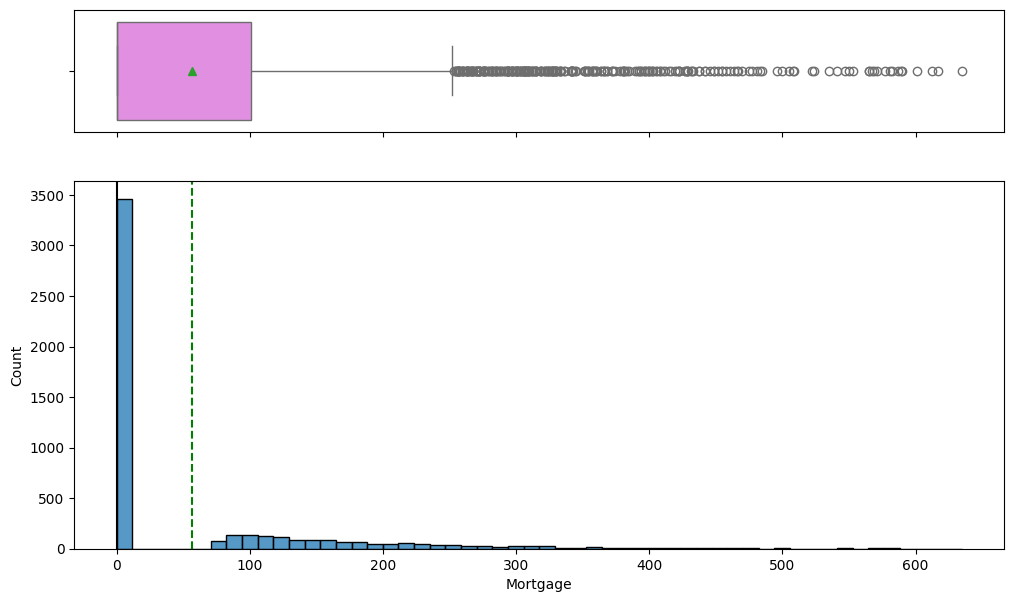

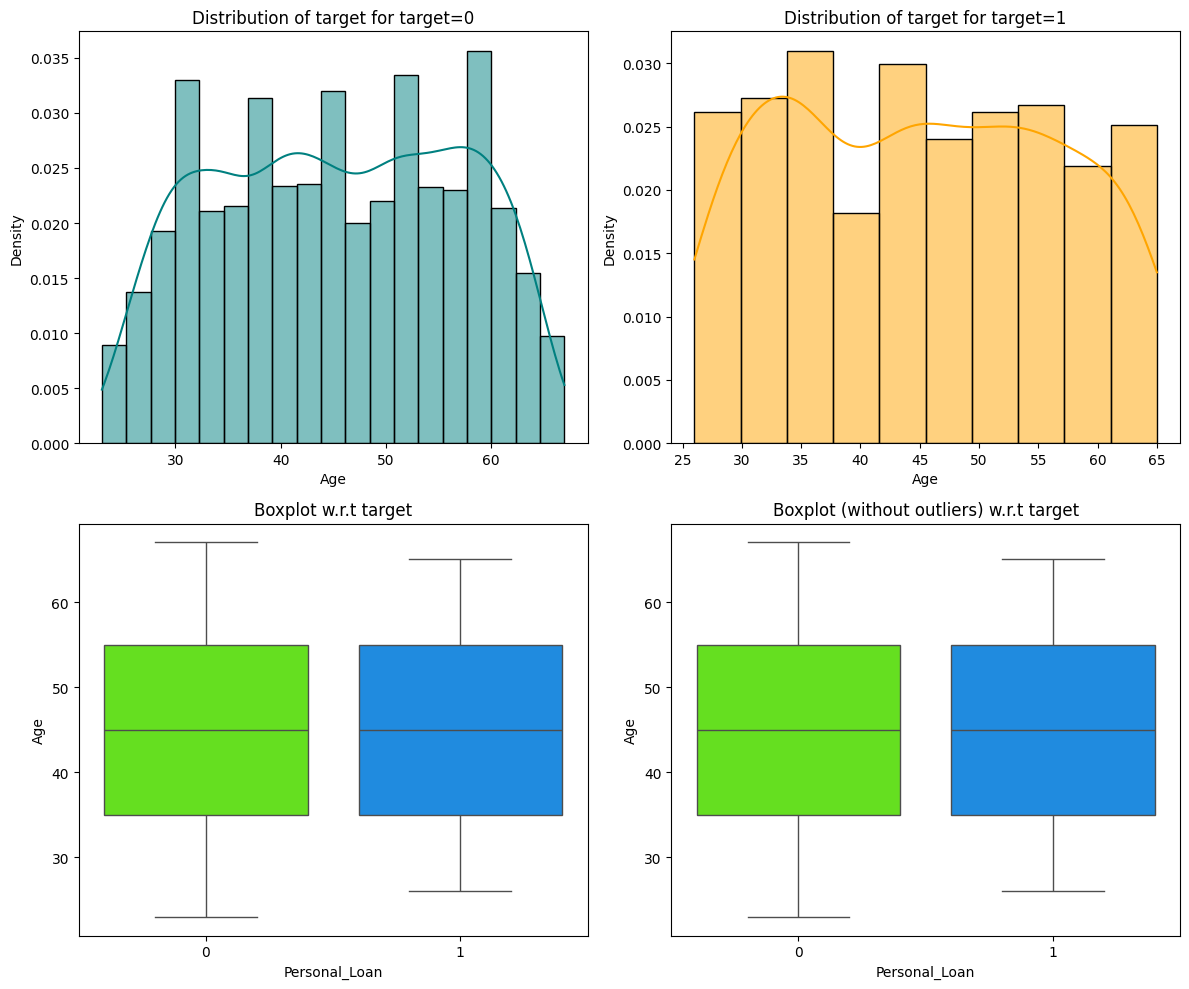

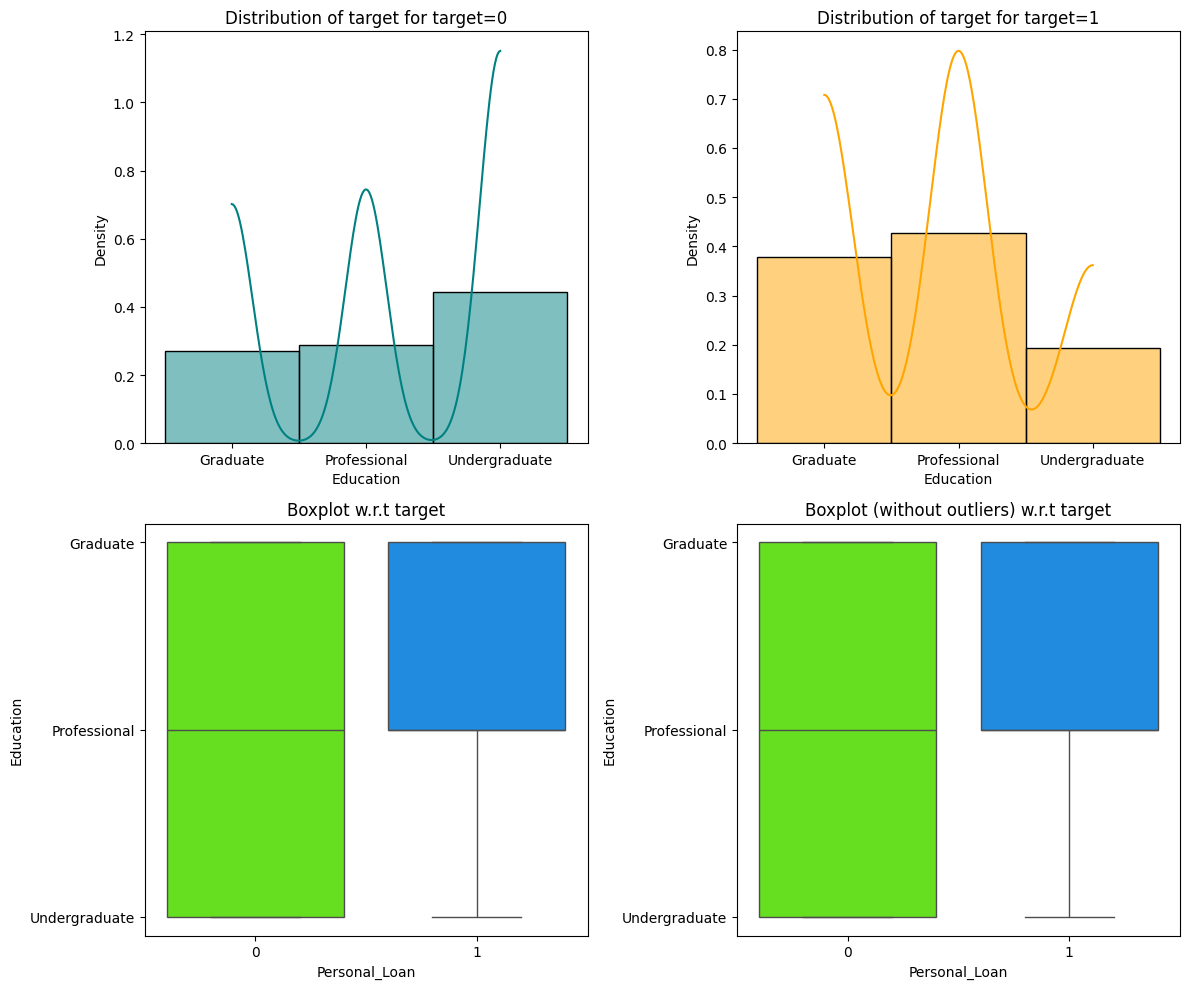

In [423]:
# Question 1: Mortgage Distribution
histogram_boxplot(data, "Mortgage")
# print(data['Mortgage'].value_counts())

# Question 2: Total Customers that have Credit Cards
print(data["CreditCard"].value_counts())
print(data["CreditCard"].value_counts()/(data.shape[0]))

# Question 4: Age vs Personal Loan
distribution_plot_wrt_target(data, "Age", "Personal_Loan")

# Question 5: Education vs Personal Loan
distribution_plot_wrt_target(data, "Education", "Personal_Loan")


## Univariate (1 Variable) Analysis:

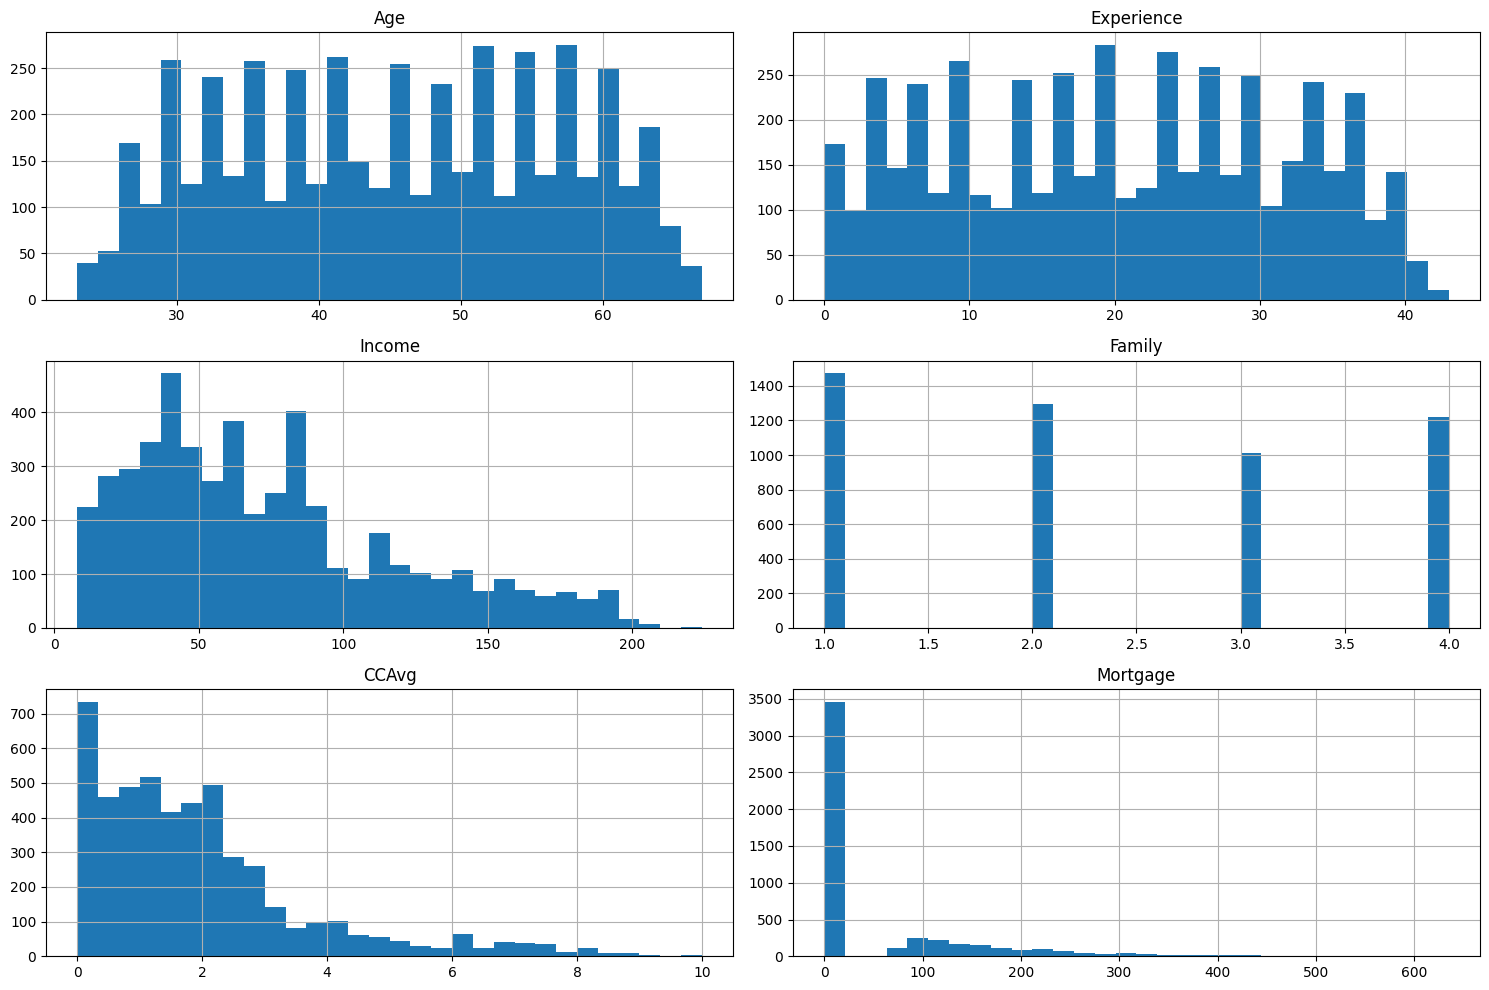

In [ ]:
# Plot histogram of all numeric variables
data.hist(figsize=(15, 10), bins=30)
plt.tight_layout()
plt.show()

### Age:

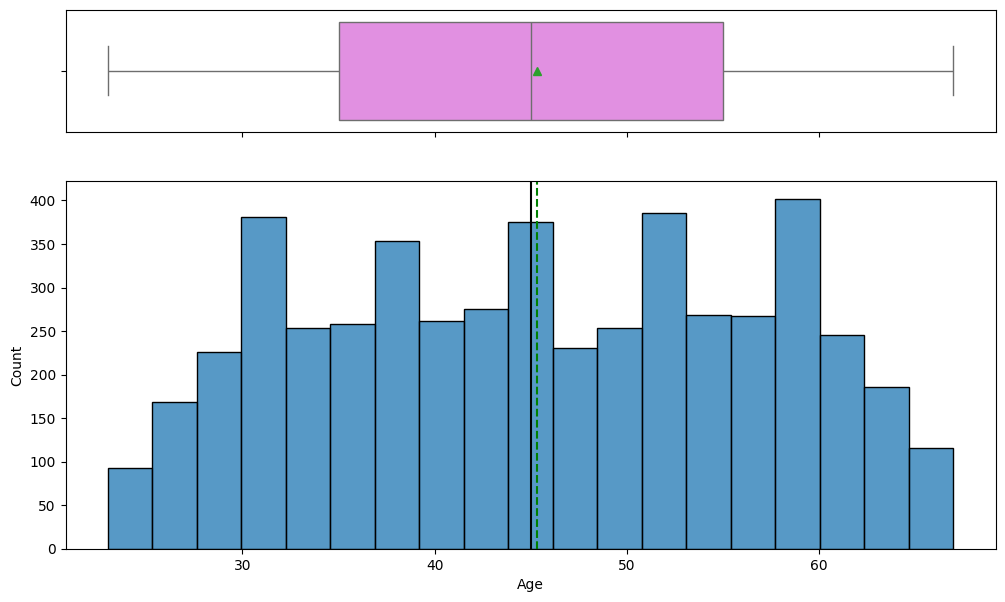

In [ ]:
# Observations on Age
histogram_boxplot(data, "Age")



* **Age:** The Average age of customers is 45 years, it has a wide range from 23 to 67 years. The distribution of Age is fairly symmetrical because the mean = median.

### Experience:

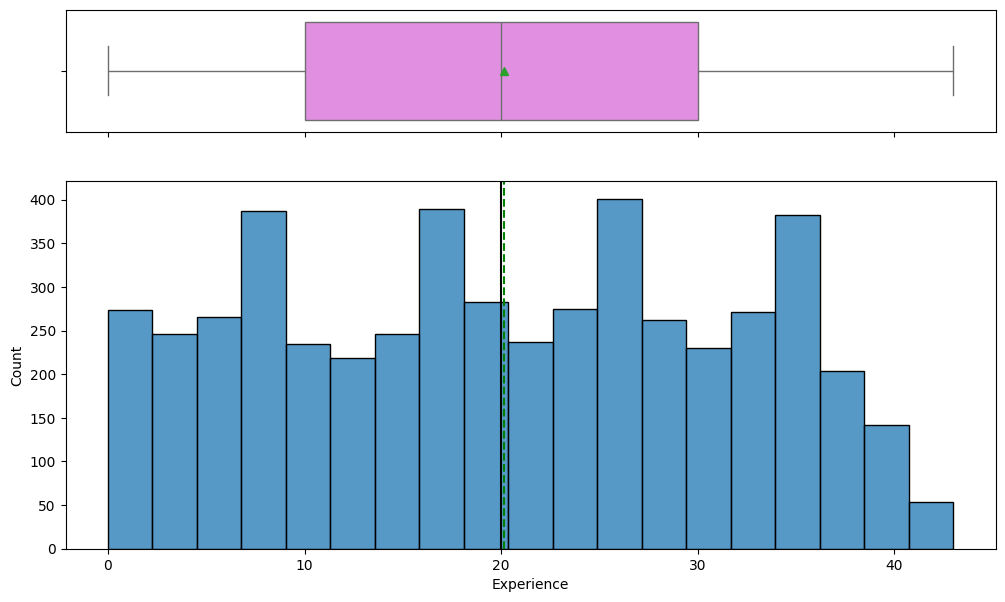

In [ ]:
# Observations on Experience
histogram_boxplot(data, "Experience")

* **Experience:**
    * The Average experience is 20 years, it has a wide range from 0 to 43 years. The distribution of Experience is fairly symmetrical again because mean = median.
    * Some customers have experience of more than 40 years.

### Income:

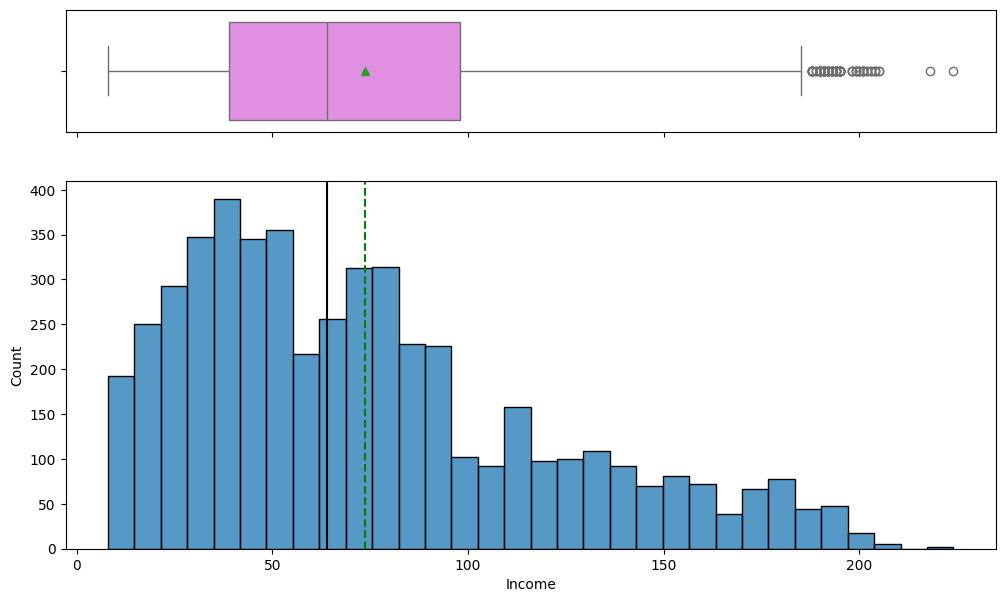

In [ ]:
# Observations on Income
histogram_boxplot(data, "Income")

* **Income:** Average income of customers is $73k dollars. Income has a wide range from 8k dollars to 224k dollars.
  * The distribution of Income is skewed to the right as mean > median (73 > 64).

  * 50% of the customers have income less than $64k dollars.

### Credit Card Average Money Spent:

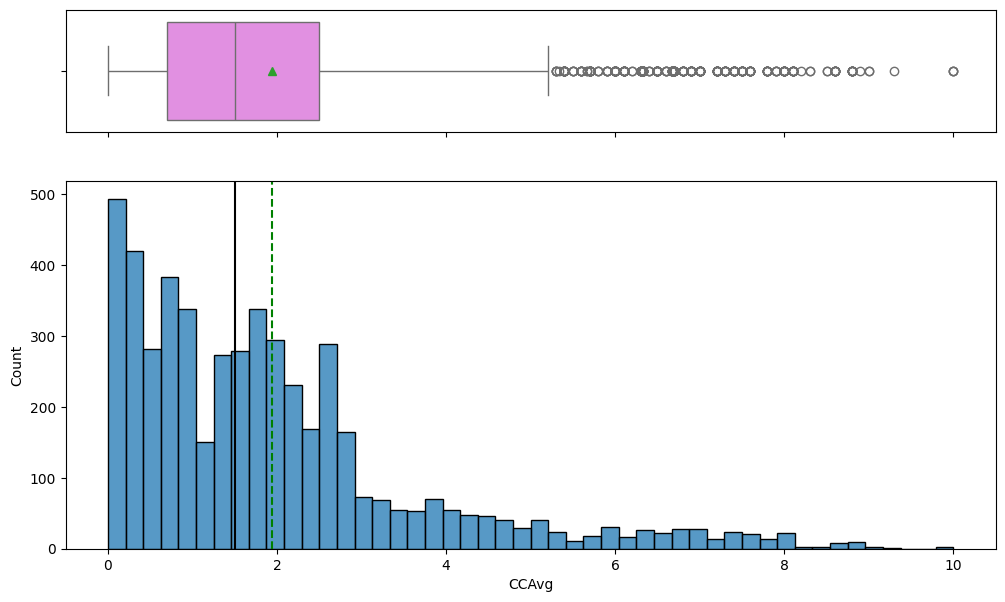

In [ ]:
# Observations on CCAvg
histogram_boxplot(data, "CCAvg")


* **CCAvg:**
    * Customers have average credit card spending of $1.93 a month.
    * The distribution of CCAvg is skewed to the right and there are many outliers.
    * 50% of the customers have CCAvg less than $1.5.



### Mortgage:

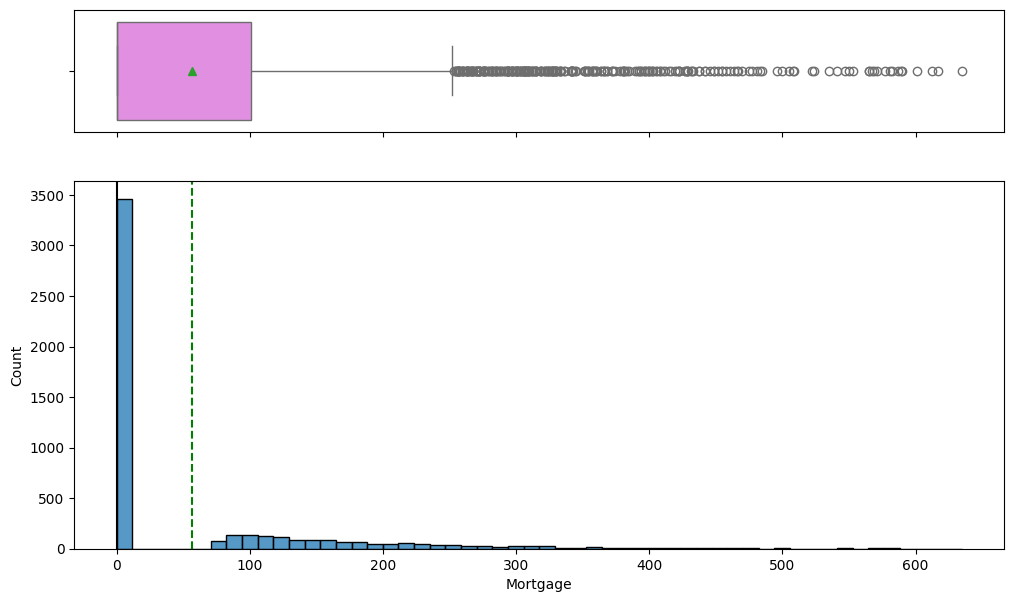

In [ ]:
# Observations on Mortgage
histogram_boxplot(data, "Mortgage")

* **Mortgage:**
    * Average mortgage value of house of customers is $56k dollars.
    * Most customers have not mortgaged their house but there are many outliers.
    * Some customers have a mortgage house value of more than 600k dollars. Such customers can be potential customers who require a personal loan.


### Family:

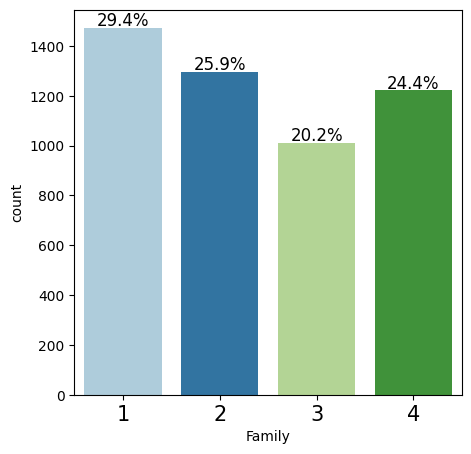

In [ ]:
# Observations on Family
labeled_barplot(data, "Family", perc=True)


* **Family:**
    * The average # of people in a family are 2.
    * Most customers are single/live alone (~30%).

### Education:

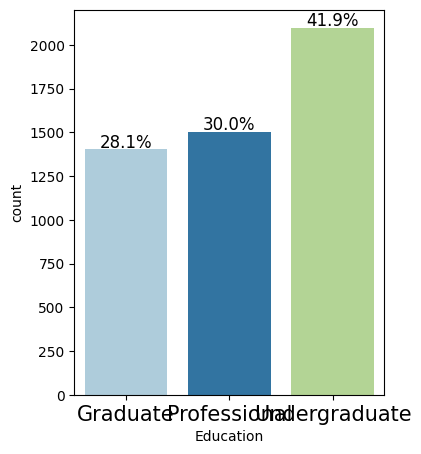

In [ ]:
# Observations on Education
labeled_barplot(data, "Education", perc=True)

* **Education:**
    * Most customers are undergrads. (~42%)

### Accounts (2):

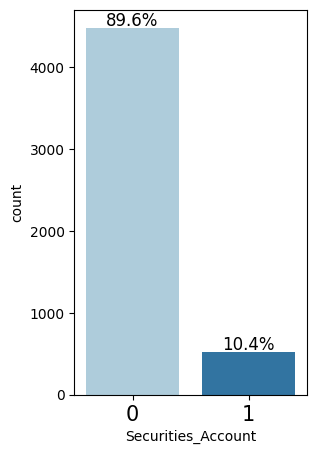

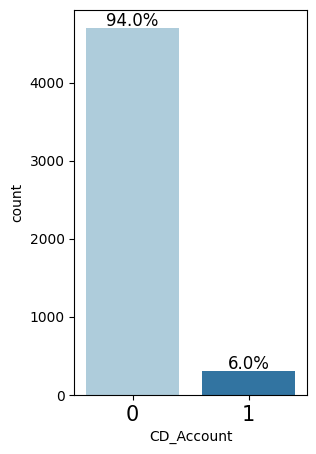

In [ ]:
# Observations on Securities_Account
labeled_barplot(data, "Securities_Account", perc=True)
# Observations on CD_Account
labeled_barplot(data, "CD_Account", perc=True)


* **Accounts (2):**
    * Most people do NOT have a Securities Account or a CD Account (Certificate of Deposit).

### Online/CreditCard/ZIP Code:

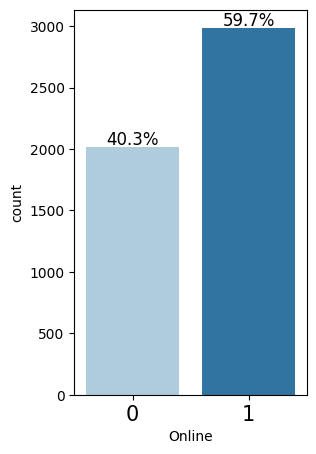

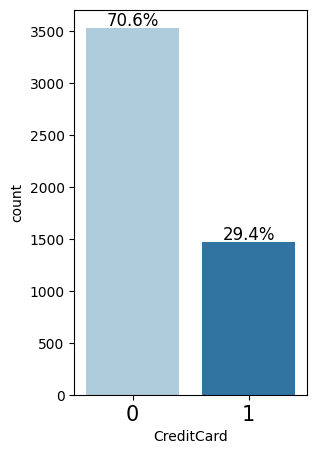

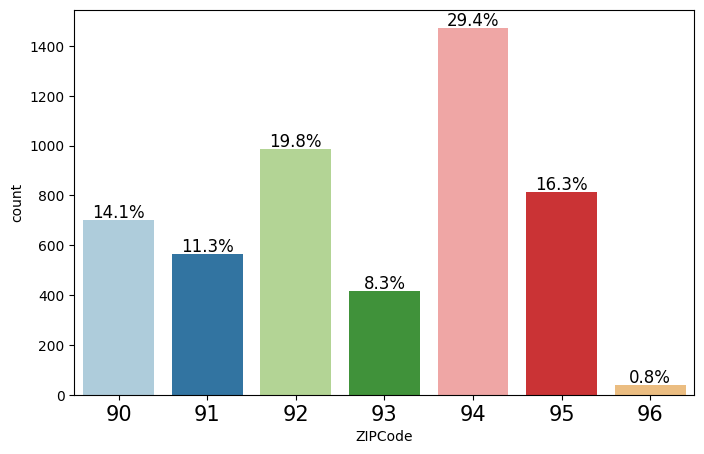

In [ ]:
# Observations on Online
labeled_barplot(data, "Online", perc=True)
# Observation on CreditCard
labeled_barplot(data, "CreditCard", perc=True)
# Observation on ZIPCode
labeled_barplot(data, "ZIPCode", perc=True)


* **Online:** Most people make their deposits/transactions online (~60%)
* **Credit Card:** Most people do NOT have a credit card (~70%)
* **ZIP Code:** Most people engaging with this bank come from ZIP Code: 94.

## Multivariate (2/More Variables) Analysis:

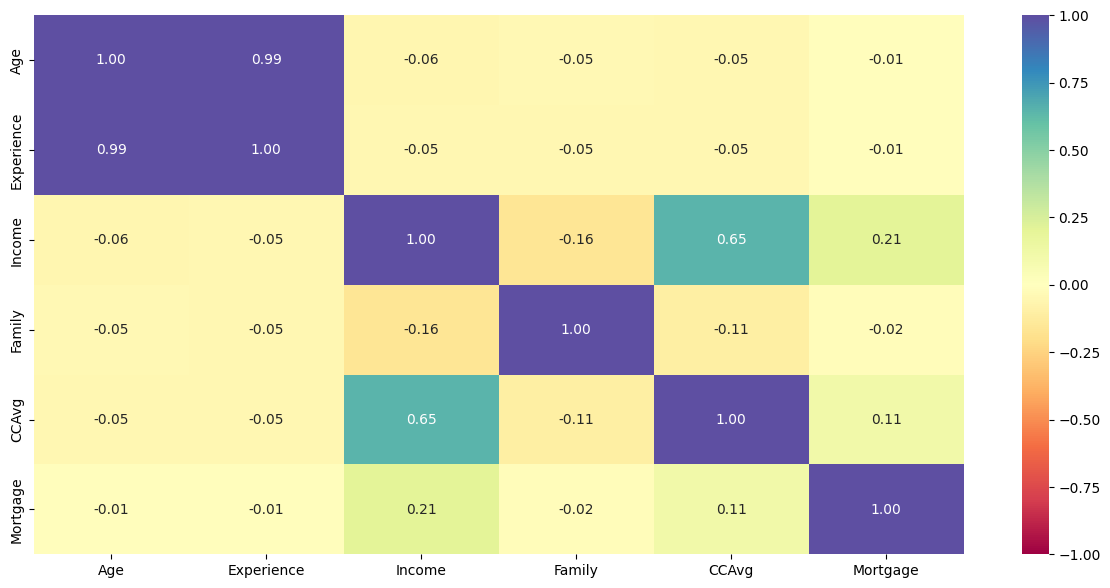

In [ ]:
# Correlation check
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral") # Complete the code to get the heatmap of the data
plt.show()

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
Professional   1296  205  1501
Graduate       1221  182  1403
Undergraduate  2003   93  2096
------------------------------------------------------------------------------------------------------------------------


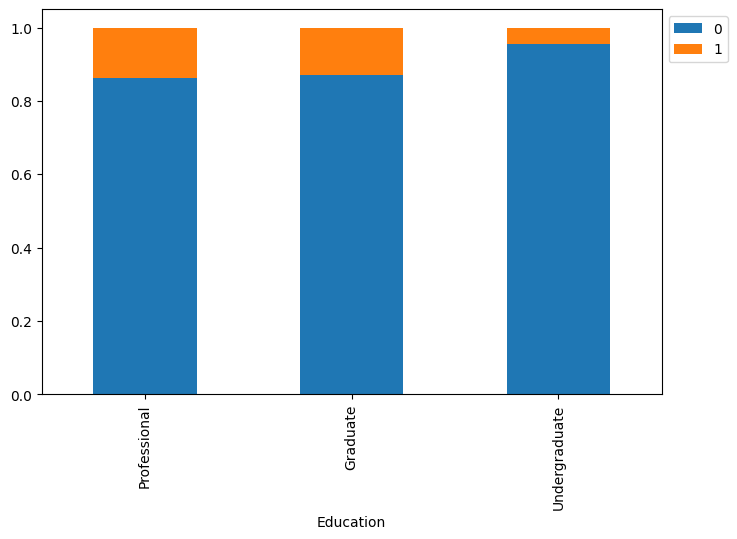

In [ ]:
# Let's check how a customer's interest in purchasing a loan varies with their education
# Personal_Loan vs Education (using a stacked barPlot)
stacked_barplot(data, "Education", "Personal_Loan")

* ~15% of the customers who have done graduate/professional studies are the ones that require a personal loan.
* Undergraduates have the least requirement of personal loans.

Personal_Loan     0    1   All
Family                        
All            4520  480  5000
4              1088  134  1222
3               877  133  1010
1              1365  107  1472
2              1190  106  1296
------------------------------------------------------------------------------------------------------------------------


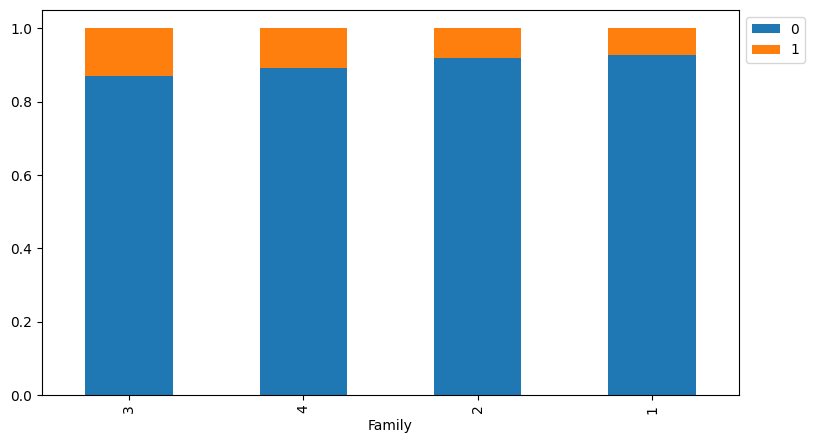

In [ ]:
# Personal_Loan vs Family
stacked_barplot(data, "Family", "Personal_Loan")

* Basically all family groups need loans.

Personal_Loan          0    1   All
Securities_Account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522
------------------------------------------------------------------------------------------------------------------------


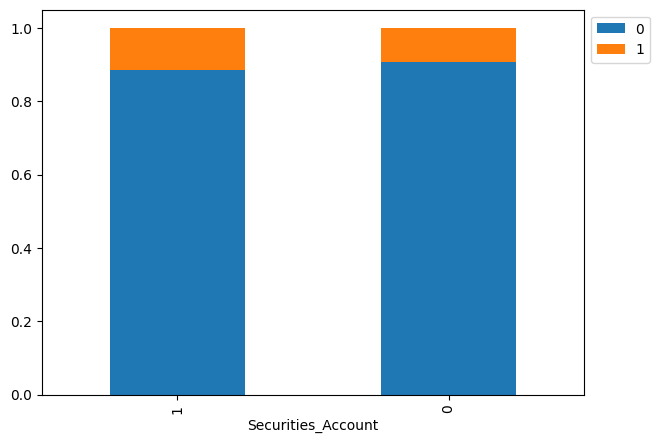

Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302
------------------------------------------------------------------------------------------------------------------------


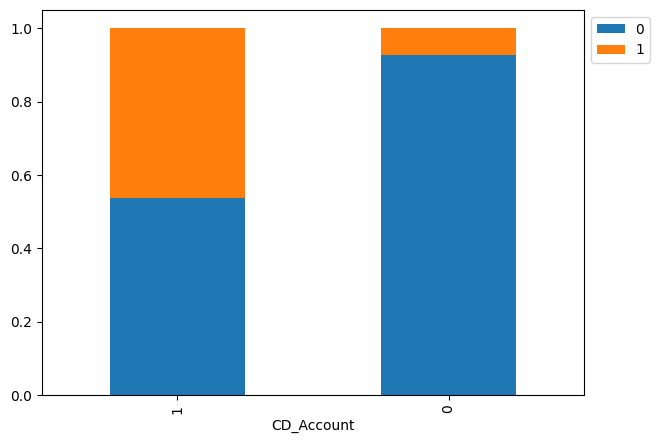

In [ ]:
# Personal_Loan vs Securities_Account
stacked_barplot(data, "Securities_Account", "Personal_Loan")
# Personal_Loan vs CD_Account
stacked_barplot(data, "CD_Account", "Personal_Loan")


Personal_Loan     0    1   All
Online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016
------------------------------------------------------------------------------------------------------------------------


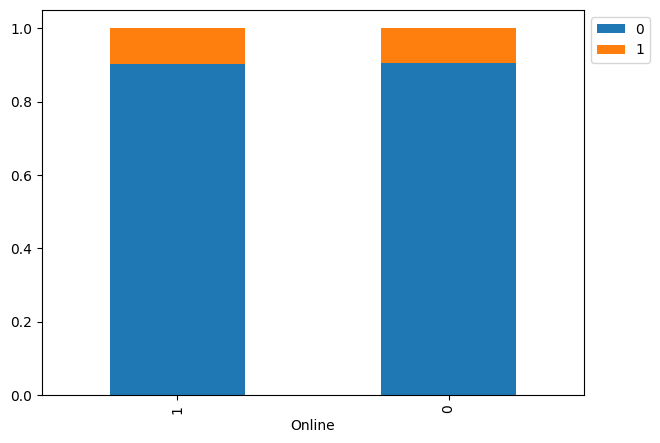

Personal_Loan     0    1   All
CreditCard                    
All            4520  480  5000
0              3193  337  3530
1              1327  143  1470
------------------------------------------------------------------------------------------------------------------------


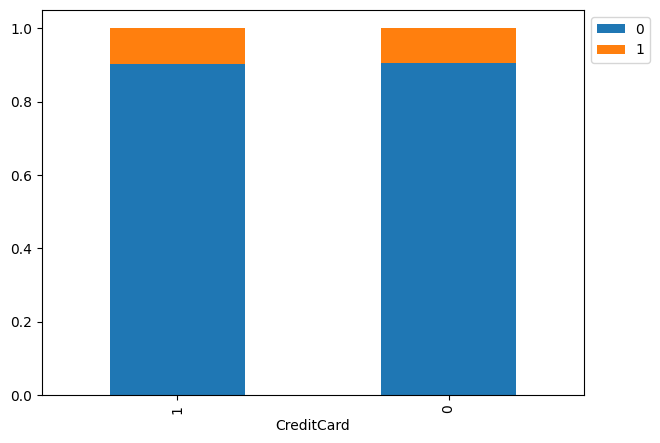

Personal_Loan     0    1   All
ZIPCode                       
All            4520  480  5000
94             1334  138  1472
92              894   94   988
95              735   80   815
90              636   67   703
91              510   55   565
93              374   43   417
96               37    3    40
------------------------------------------------------------------------------------------------------------------------


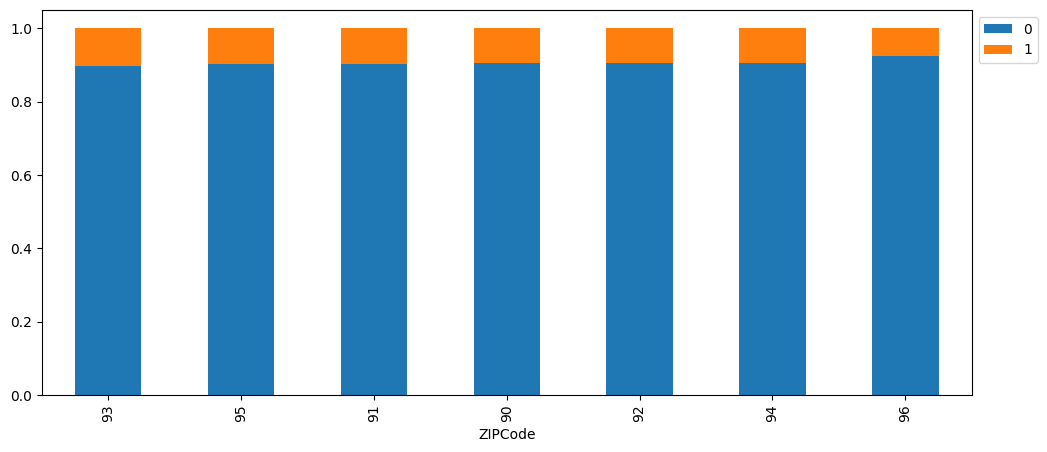

In [ ]:
# Personal_Loan vs Online
stacked_barplot(data, "Online", "Personal_Loan")
# Personal_Loan vs CreditCard
stacked_barplot(data, "CreditCard", "Personal_Loan")
# Personal_Loan vs ZIPCode
stacked_barplot(data, "ZIPCode", "Personal_Loan")

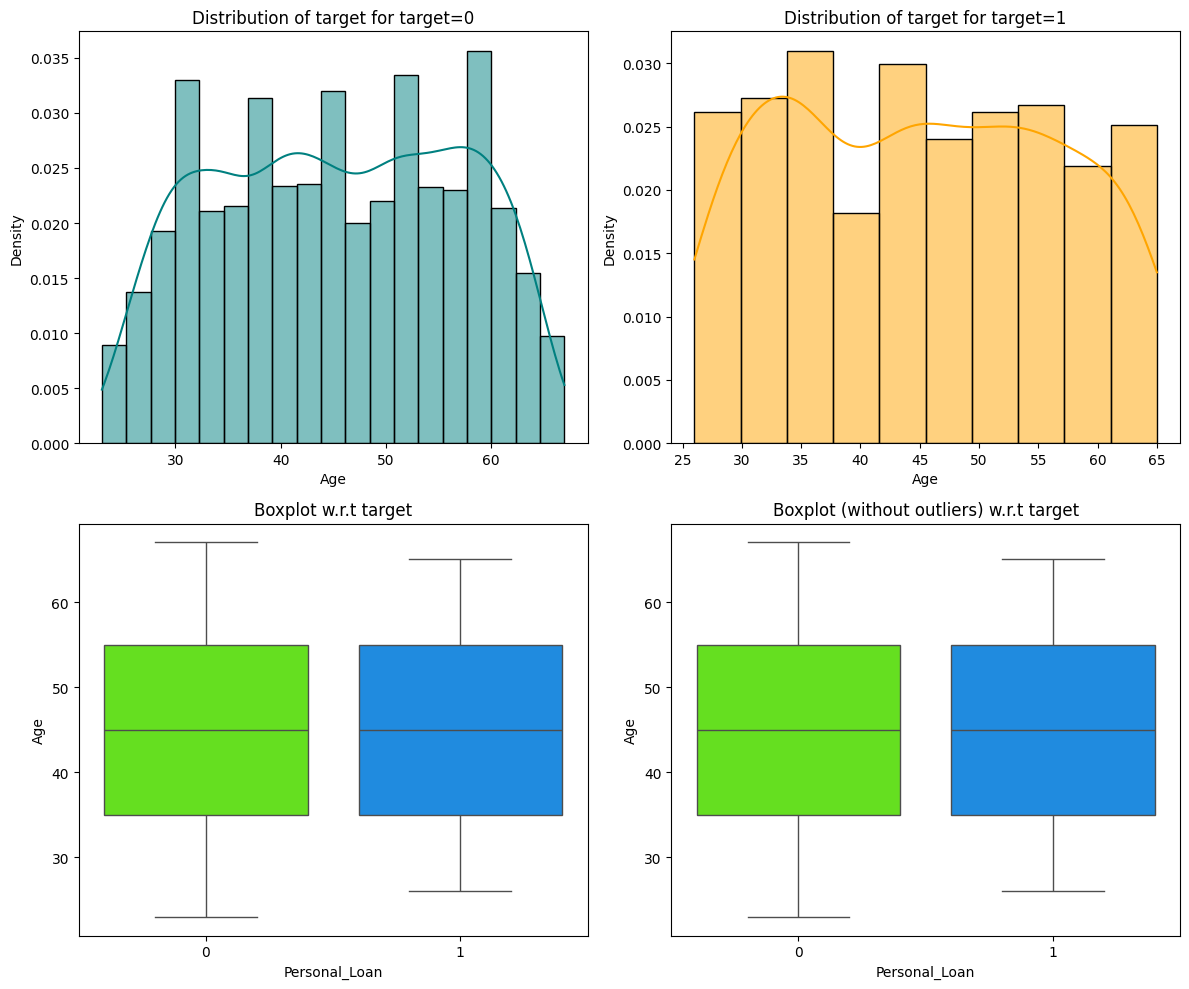

In [ ]:
# Let's check how a customer's interest in purchasing a loan varies with their age
# Personal Loan vs Age (using a distrib. Plot)
distribution_plot_wrt_target(data, "Age", "Personal_Loan")


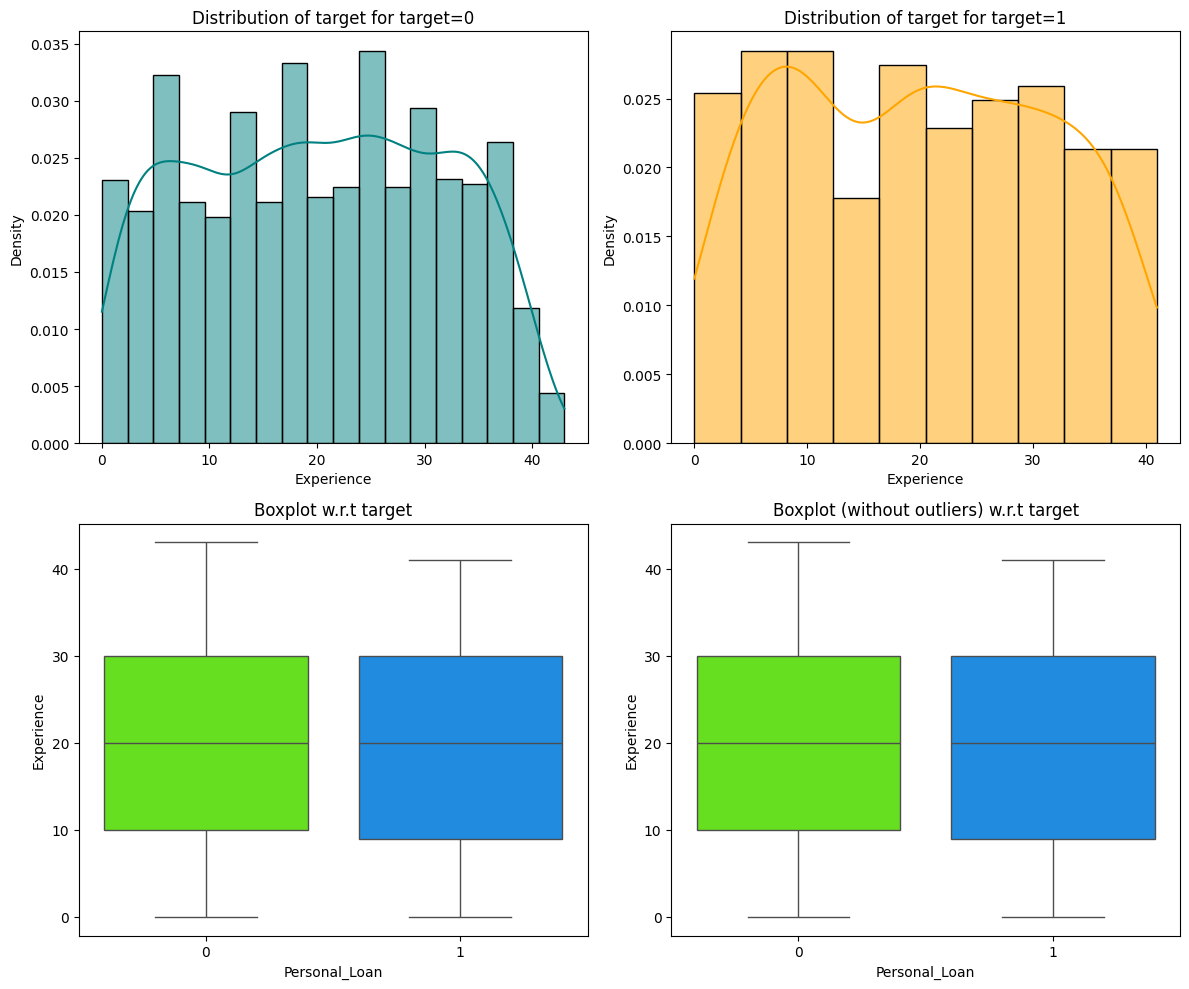

In [ ]:
# Personal Loan vs Experience
distribution_plot_wrt_target(data, "Experience", "Personal_Loan")


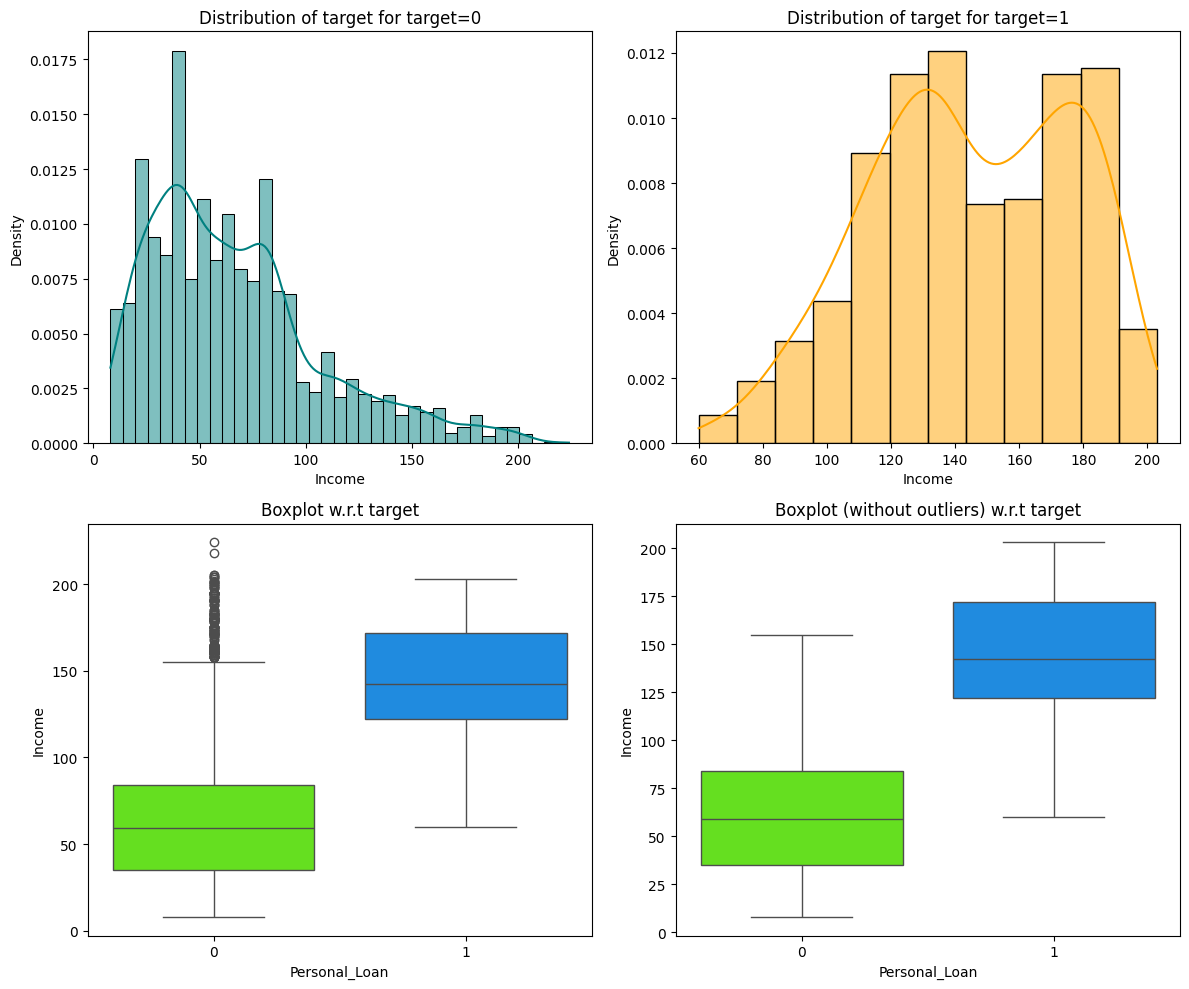

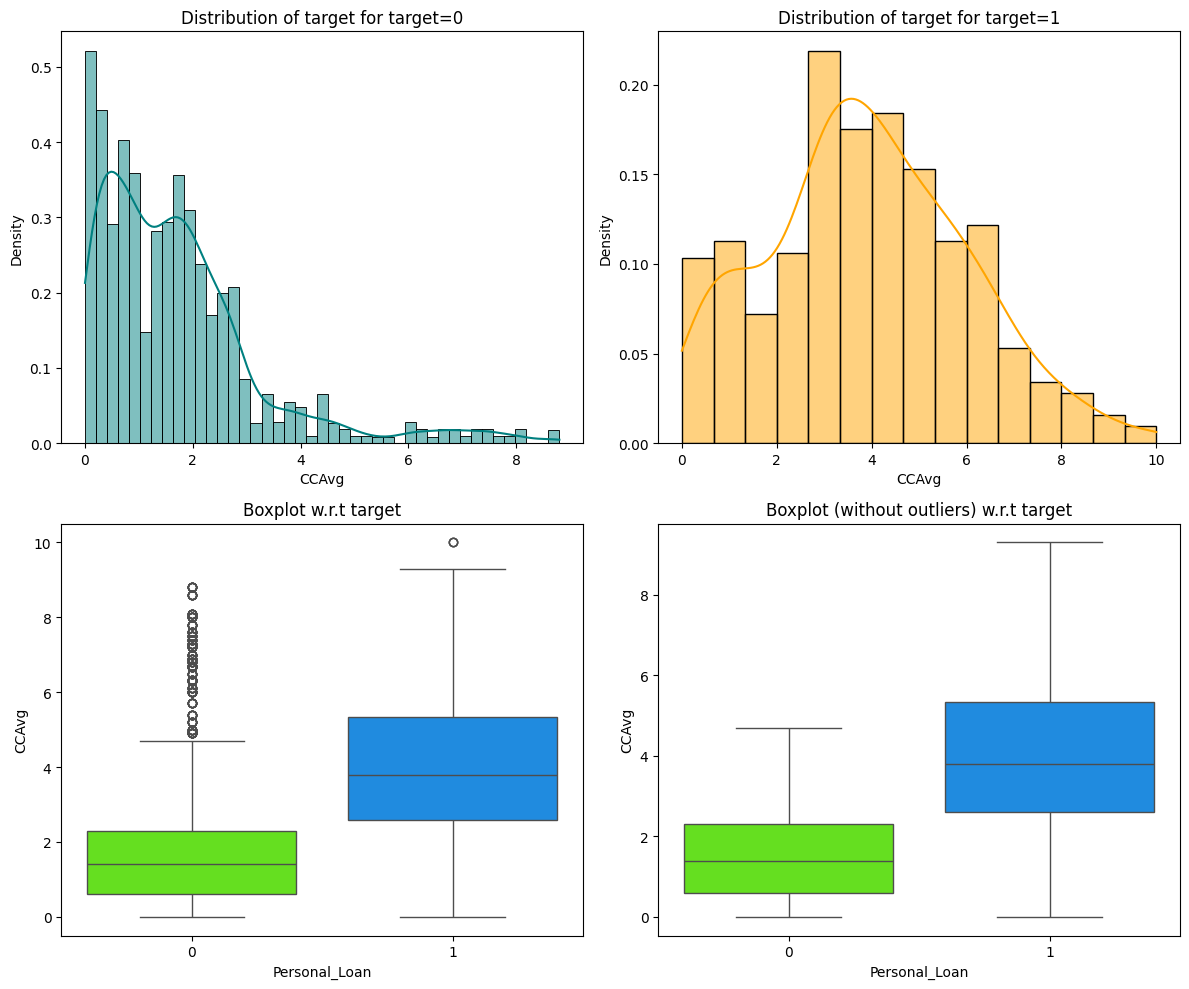

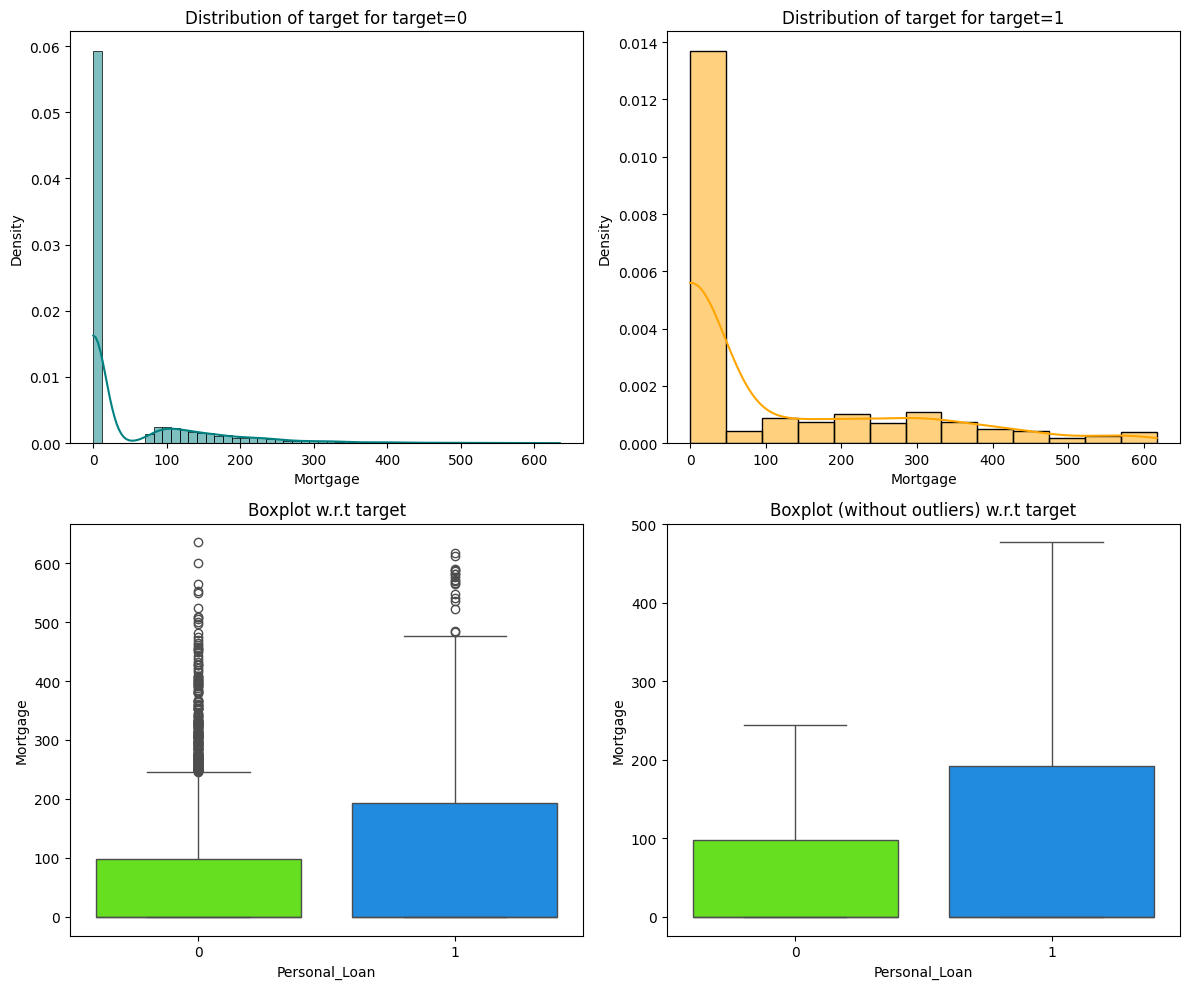

In [ ]:
# Personal Loan vs Income
distribution_plot_wrt_target(data, "Income", "Personal_Loan")
# Personal Loan vs CCAvg
distribution_plot_wrt_target(data, "CCAvg", "Personal_Loan")
# Personal Loan vs Mortgage
distribution_plot_wrt_target(data, "Mortgage", "Personal_Loan")

## Data Prep for Model Building

In [ ]:
# Data Preparation for Model-Building
# dropping Experience as it is perfectly correlated with Age
X = data.drop(["Personal_Loan", "Experience"], axis=1)
Y = data["Personal_Loan"]

X = pd.get_dummies(X, columns=["ZIPCode", "Education"], drop_first=True)

X = X.astype(float)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))


Shape of Training set :  (3500, 17)
Shape of test set :  (1500, 17)
Percentage of classes in training set:
Personal_Loan
0    0.905429
1    0.094571
Name: proportion, dtype: float64
Percentage of classes in test set:
Personal_Loan
0    0.900667
1    0.099333
Name: proportion, dtype: float64


### Model Evaluation Criterion

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Model Building

### 1. Original Decision Tree

In [ ]:
# Decision Tree (sklearn default)
model0 = DecisionTreeClassifier(criterion="gini", random_state=1)
model0.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


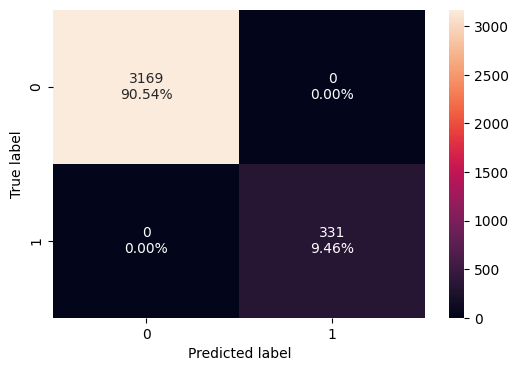

In [ ]:
# Checking model performance on training data
confusion_matrix_sklearn(model0, X_train, y_train)
decision_tree_perf_train = model_performance_classification_sklearn(model0, X_train, y_train)
decision_tree_perf_train

['Age', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'ZIPCode_91', 'ZIPCode_92', 'ZIPCode_93', 'ZIPCode_94', 'ZIPCode_95', 'ZIPCode_96', 'Education_Professional', 'Education_Undergraduate']


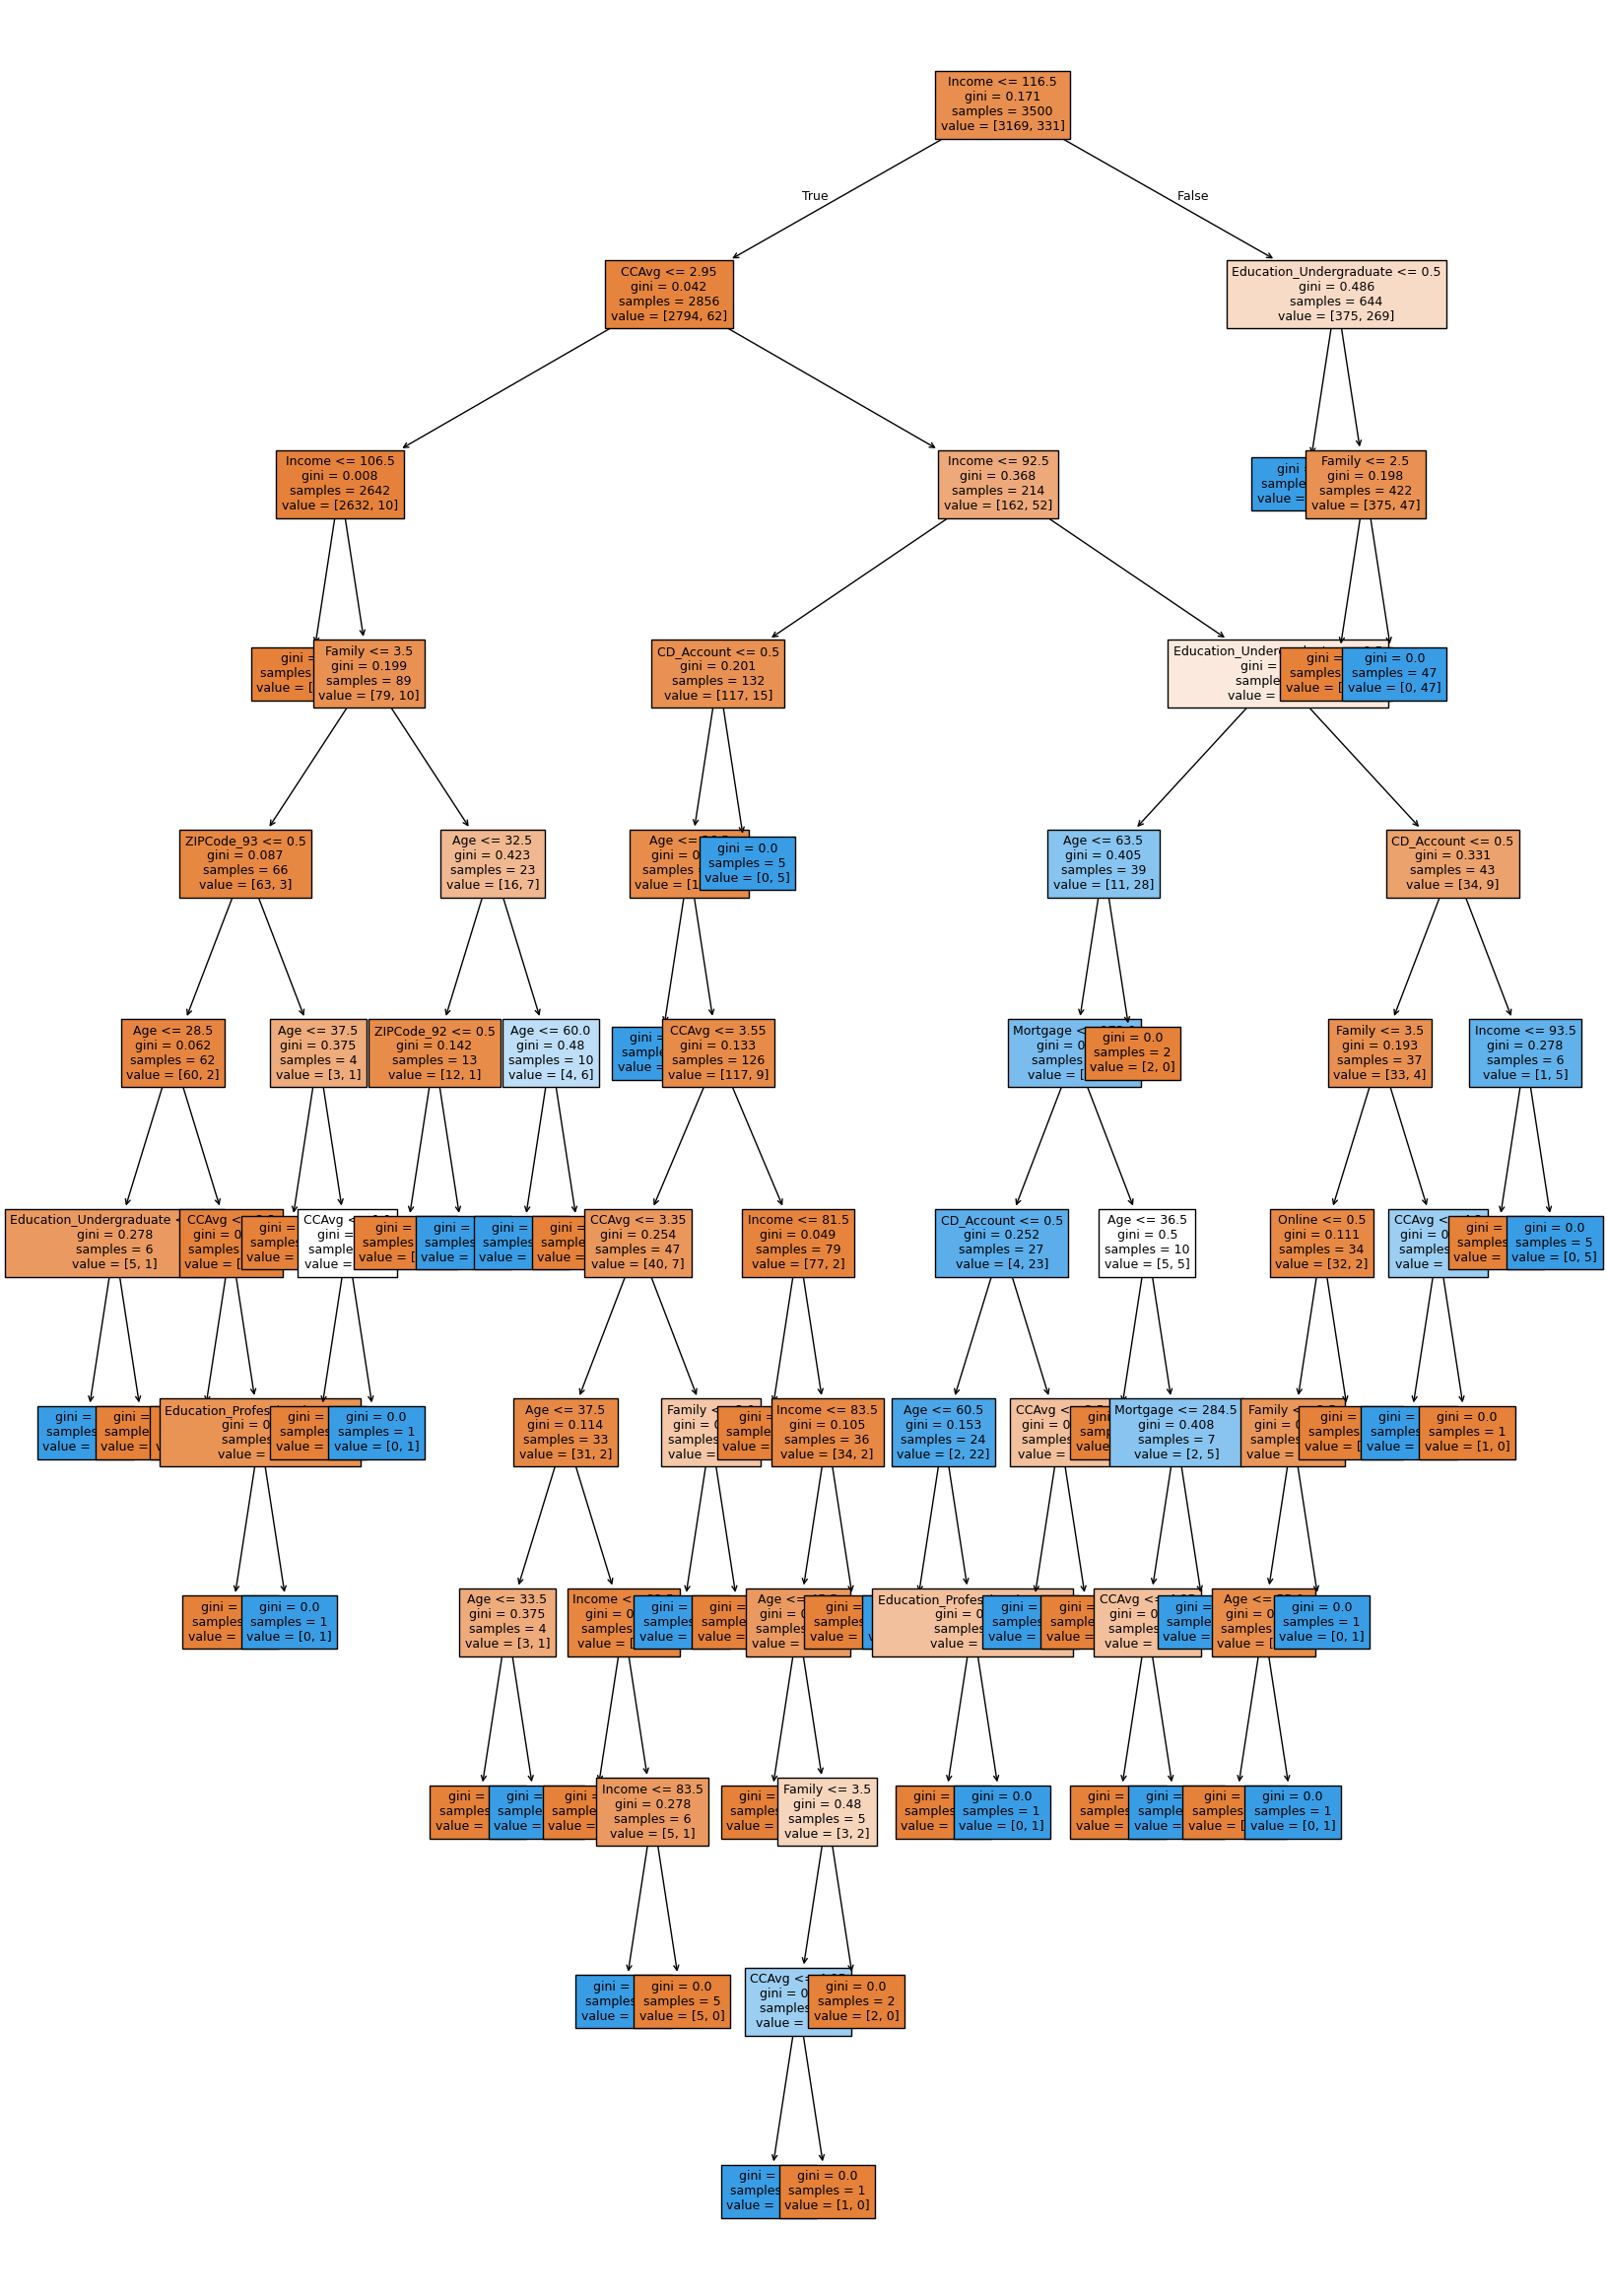

In [ ]:
# Visualizing the Decision Tree
feature_names = list(X_train.columns)
print(feature_names)
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model0,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -
print(tree.export_text(model0, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- ZIPCode_93 <= 0.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- Education_Undergraduate <= 0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |   |--- Education_Undergraduate >  0.50
|   |   |   |   |   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- CCAvg <= 2.20
|   |   |   |   |   |   |   |--- weights: [48.00, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  2.20
|   |   |   |   |   |   |   |--- Education_Professional <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [7.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- Education_Professional >  0.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- ZIPCode_93

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        model0.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                              Imp
Education_Undergraduate  0.403732
Income                   0.304761
Family                   0.161717
CCAvg                    0.053107
Age                      0.036035
CD_Account               0.025711
Mortgage                 0.005557
Education_Professional   0.005144
ZIPCode_92               0.003080
ZIPCode_93               0.000594
Online                   0.000561
CreditCard               0.000000
Securities_Account       0.000000
ZIPCode_94               0.000000
ZIPCode_91               0.000000
ZIPCode_96               0.000000
ZIPCode_95               0.000000


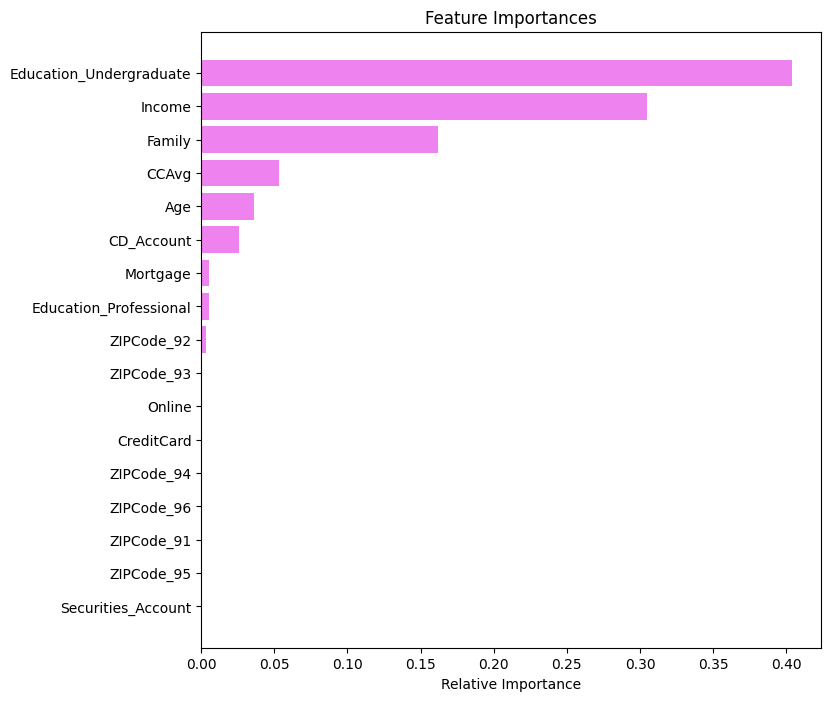

In [ ]:
importances = model0.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

,Accuracy,Recall,Precision,F1
0,0.981333,0.899329,0.911565,0.905405


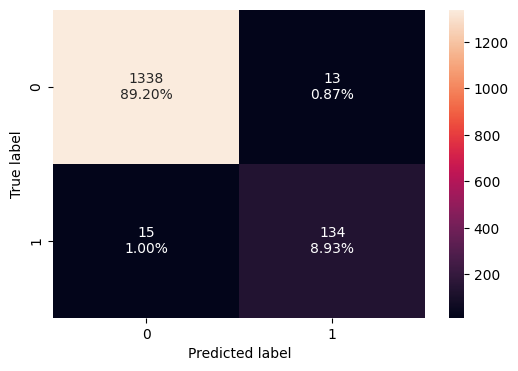

In [ ]:
# Checking model performance on test data
confusion_matrix_sklearn(model0, X_test, y_test) ## Complete the code to create confusion matrix for test data
decision_tree_perf_test = model_performance_classification_sklearn(model0, X_test, y_test) ## Complete the code to check performance on test data
decision_tree_perf_test


## Model Performance Improvement

### 2. Pre-pruning the Decision Tree

In [ ]:
# Pre-pruning
# Note: The parameters provided below are a sample set. You can feel free to update the same and try out other combinations.

# Define the parameters of the tree to iterate over
max_depth_values = np.arange(2, 7, 2)
max_leaf_nodes_values = [50, 75, 150, 250]
min_samples_split_values = [10, 30, 50, 70]

# Initialize variables to store the best model and its performance
best_estimator = None
best_score_diff = float('inf')
best_test_score = 0.0

# Iterate over all combinations of the specified parameter values
for max_depth in max_depth_values:
    for max_leaf_nodes in max_leaf_nodes_values:
        for min_samples_split in min_samples_split_values:

            # Initialize the tree with the current set of parameters
            estimator = DecisionTreeClassifier(
                max_depth=max_depth,
                max_leaf_nodes=max_leaf_nodes,
                min_samples_split=min_samples_split,
                class_weight='balanced',
                random_state=42
            )

            # Fit the model to the training data
            estimator.fit(X_train, y_train)

            # Make predictions on the training and test sets
            y_train_pred = estimator.predict(X_train)
            y_test_pred = estimator.predict(X_test)

            # Calculate recall scores for training and test sets
            train_recall_score = recall_score(y_train, y_train_pred)
            test_recall_score = recall_score(y_test, y_test_pred)

            # Calculate the absolute difference between training and test recall scores
            score_diff = abs(train_recall_score - test_recall_score)

            # Update the best estimator and best score if the current one has a smaller score difference
            if (score_diff < best_score_diff) & (test_recall_score > best_test_score):
                best_score_diff = score_diff
                best_test_score = test_recall_score
                best_estimator = estimator

# creating an instance of the best model
model1 = best_estimator

# Print the best parameters
print("Best parameters found:")
print(f"Max depth: {best_estimator.max_depth}")
print(f"Max leaf nodes: {best_estimator.max_leaf_nodes}")
print(f"Min samples split: {best_estimator.min_samples_split}")
print(f"Best test recall score: {best_test_score}")


Best parameters found:
Max depth: 2
Max leaf nodes: 50
Min samples split: 10
Best test recall score: 1.0


,Accuracy,Recall,Precision,F1
0,0.790286,1.0,0.310798,0.474212


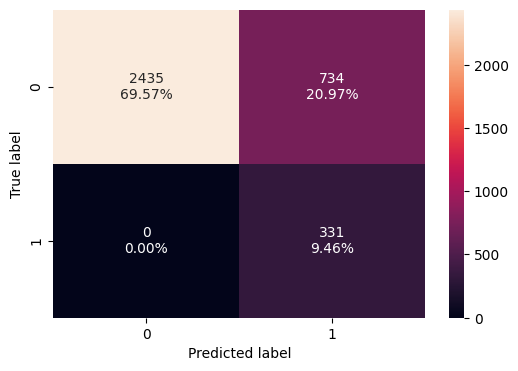

In [ ]:
# Checking performance on training data
confusion_matrix_sklearn(model1, X_train, y_train)
decision_tree_tune_perf_train = model_performance_classification_sklearn(model1, X_train, y_train)
decision_tree_tune_perf_train

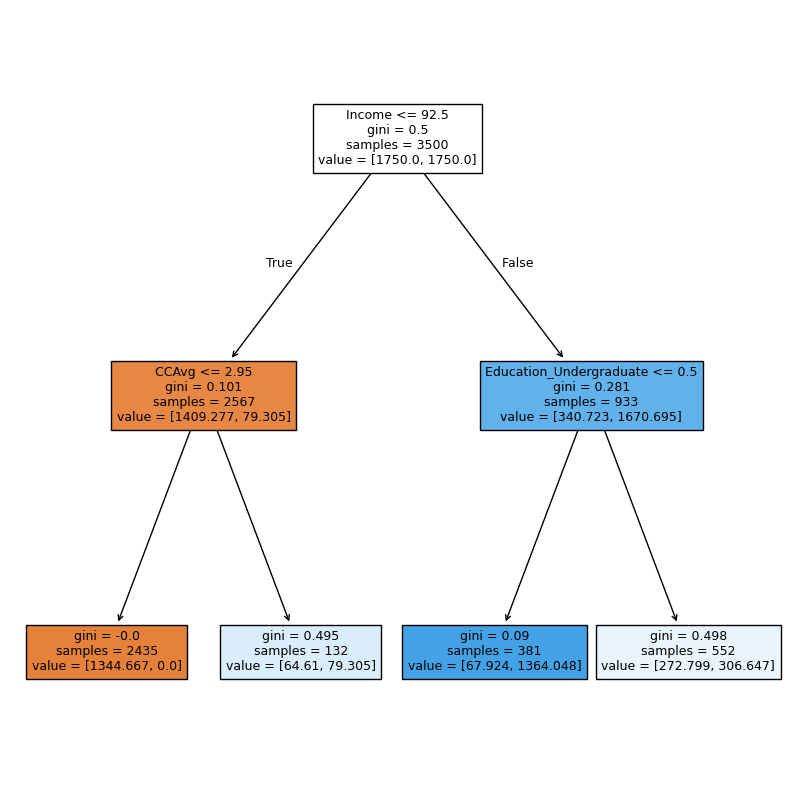

In [ ]:
# Visualizing the Decision Tree
plt.figure(figsize=(10, 10))
out = tree.plot_tree(
    model1,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model1, feature_names=feature_names, show_weights=True))
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )


|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1344.67, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- weights: [64.61, 79.31] class: 1
|--- Income >  92.50
|   |--- Education_Undergraduate <= 0.50
|   |   |--- weights: [67.92, 1364.05] class: 1
|   |--- Education_Undergraduate >  0.50
|   |   |--- weights: [272.80, 306.65] class: 1



In [ ]:
print(
    pd.DataFrame(
        model1.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                              Imp
Income                   0.820072
Education_Undergraduate  0.117300
CCAvg                    0.062628
Age                      0.000000
Family                   0.000000
Securities_Account       0.000000
CD_Account               0.000000
Online                   0.000000
Mortgage                 0.000000
CreditCard               0.000000
ZIPCode_91               0.000000
ZIPCode_93               0.000000
ZIPCode_92               0.000000
ZIPCode_94               0.000000
ZIPCode_95               0.000000
ZIPCode_96               0.000000
Education_Professional   0.000000


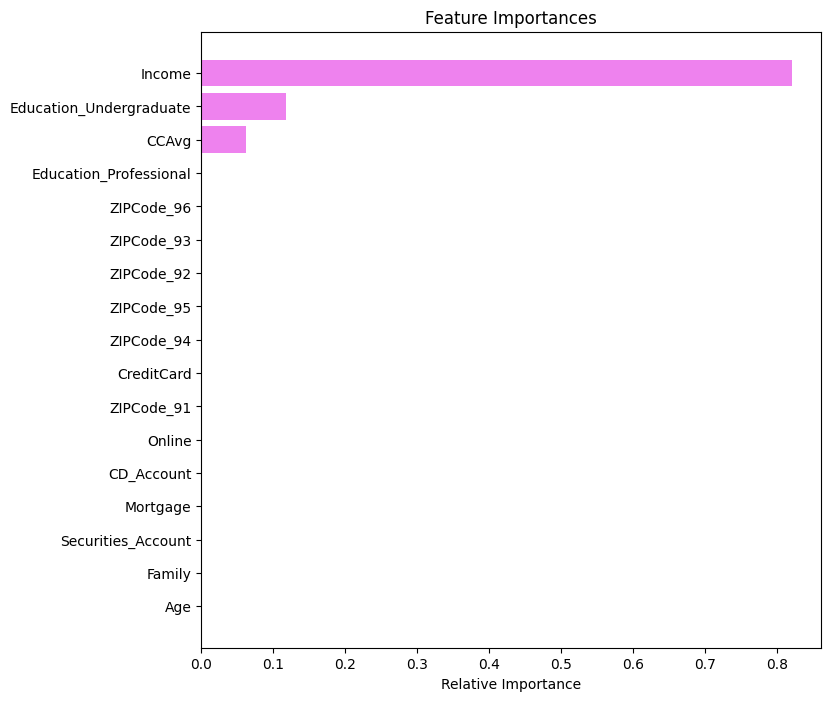

In [ ]:
importances = model1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()


,Accuracy,Recall,Precision,F1
0,0.956667,0.959732,0.707921,0.814815


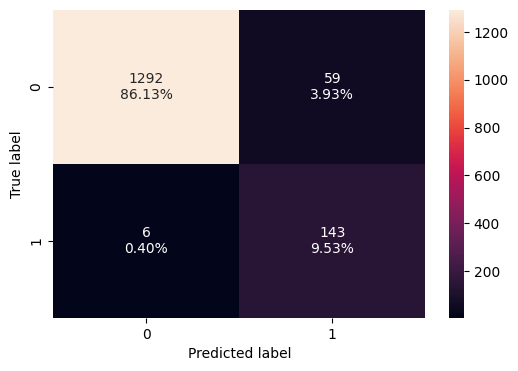

In [ ]:
# Checking performance on test data
confusion_matrix_sklearn(estimator, X_test, y_test)  # Complete the code to get the confusion matrix on test data
decision_tree_tune_perf_test = model_performance_classification_sklearn(estimator, X_test, y_test) ## Complete the code to check performance on test data
decision_tree_tune_perf_test

### 3. Post-pruning the Decision Tree

In [ ]:
# Post-pruning
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

pd.DataFrame(path)


,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000214,0.000429
2,0.000223,0.001542
3,0.000242,0.002750
4,0.000268,0.003824
5,0.000359,0.004900
6,0.000381,0.005280
7,0.000381,0.005661
8,0.000381,0.006042
9,0.000381,0.006423


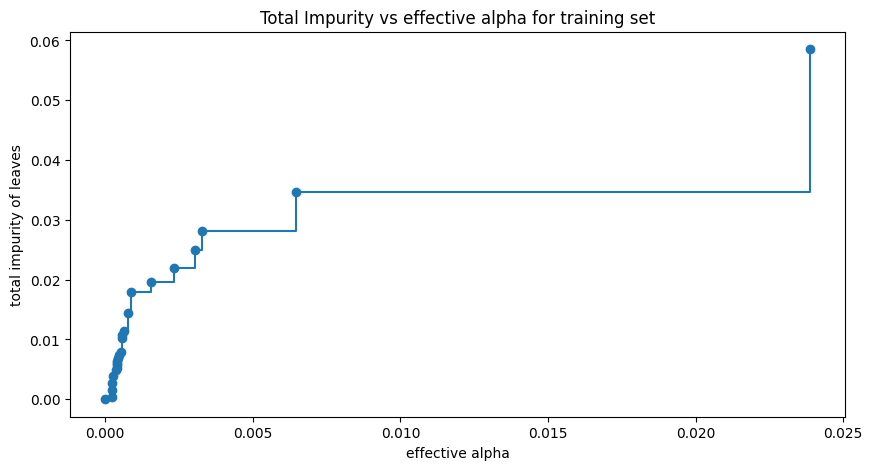

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [ ]:
# Next, we train a decision tree using effective alphas.
# The last value in ccp_alphas is the alpha value that prunes the whole tree,
  # leaving the tree, clfs[-1], with one node.

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)    ## Complete the code to fit decision tree on training data
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.056364969335601575


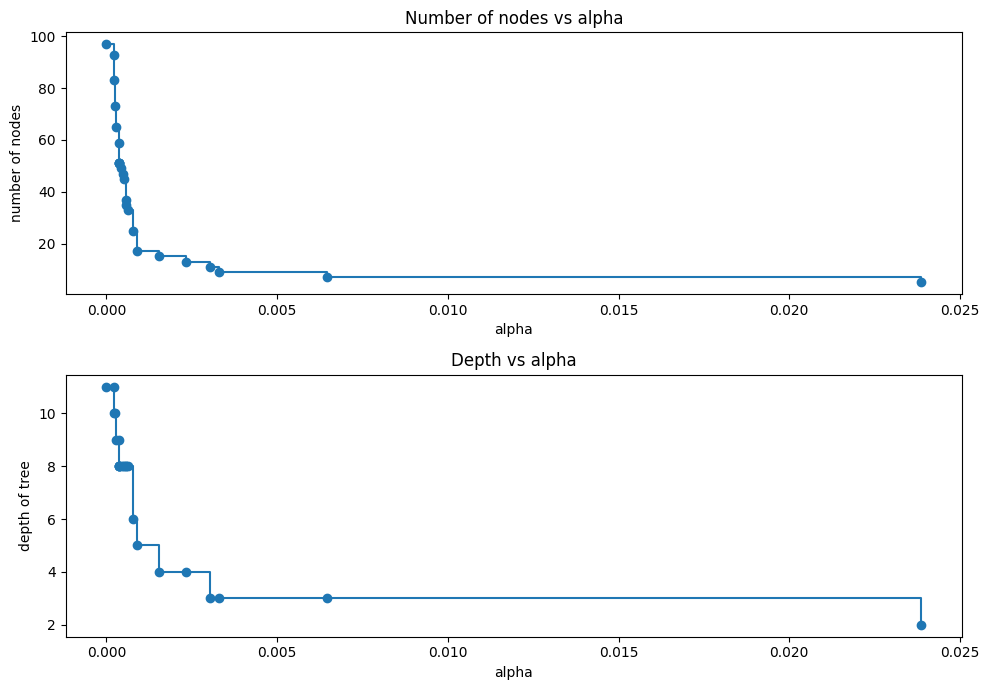

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [ ]:
# Recall vs alpha for training and testing sets
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

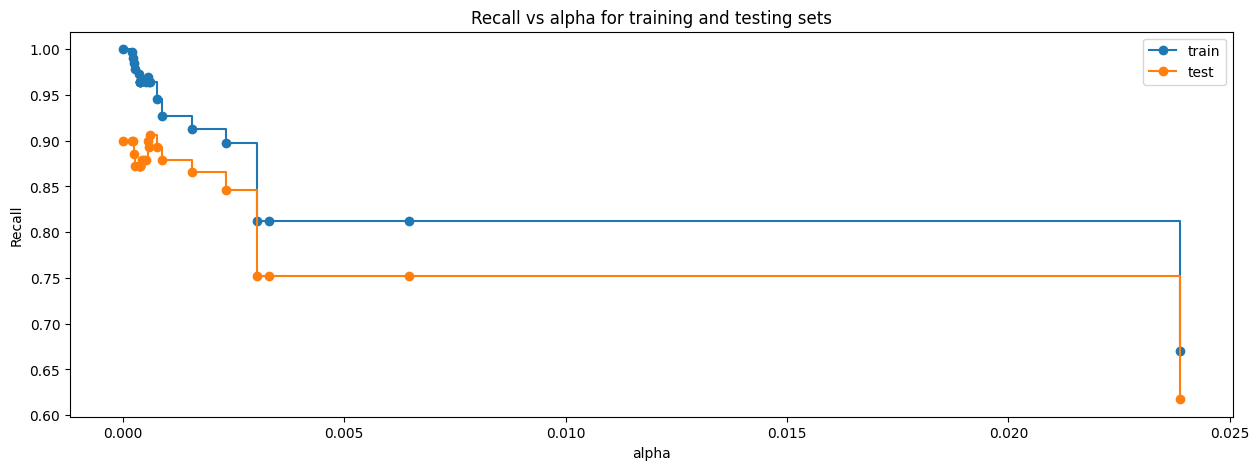

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
model2 = best_model
print(best_model)

DecisionTreeClassifier(ccp_alpha=np.float64(0.0006209286209286216),
                       random_state=1)


In [ ]:
estimator_2 = DecisionTreeClassifier(
    ccp_alpha=ccp_alpha, class_weight={0: 0.15, 1: 0.85}, random_state=1         ## Complete the code by adding the correct ccp_alpha value
)
estimator_2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=np.float64(0.056364969335601575),
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)

,Accuracy,Recall,Precision,F1
0,0.993143,0.963746,0.963746,0.963746


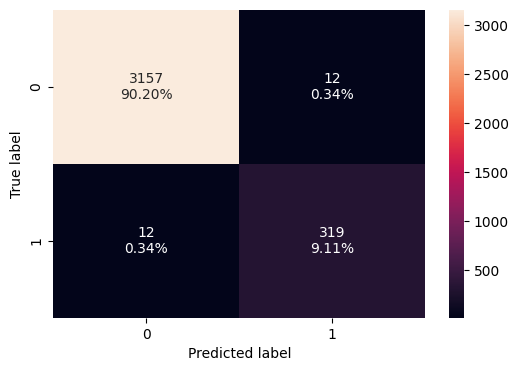

In [376]:
# Checking performance on training data
confusion_matrix_sklearn(model2, X_train, y_train)
decision_tree_tune_post_train = model_performance_classification_sklearn(model2, X_train, y_train) ## Complete the code to check performance on train data
decision_tree_tune_post_train

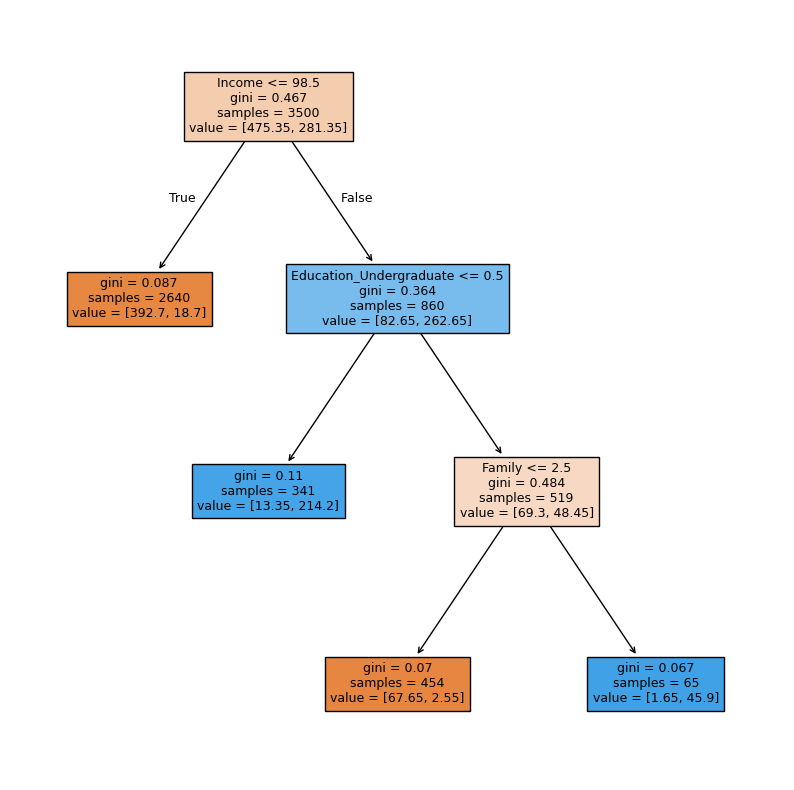

In [377]:
# Visualizing the Decision Tree
plt.figure(figsize=(10, 10))
out = tree.plot_tree(
    estimator_2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [379]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator_2, feature_names=feature_names, show_weights=True))

|--- Income <= 98.50
|   |--- weights: [392.70, 18.70] class: 0
|--- Income >  98.50
|   |--- Education_Undergraduate <= 0.50
|   |   |--- weights: [13.35, 214.20] class: 1
|   |--- Education_Undergraduate >  0.50
|   |   |--- Family <= 2.50
|   |   |   |--- weights: [67.65, 2.55] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- weights: [1.65, 45.90] class: 1



                              Imp
Income                   0.674921
Family                   0.171953
Education_Undergraduate  0.153126
Age                      0.000000
CCAvg                    0.000000
Securities_Account       0.000000
CD_Account               0.000000
Online                   0.000000
Mortgage                 0.000000
CreditCard               0.000000
ZIPCode_91               0.000000
ZIPCode_93               0.000000
ZIPCode_92               0.000000
ZIPCode_94               0.000000
ZIPCode_95               0.000000
ZIPCode_96               0.000000
Education_Professional   0.000000


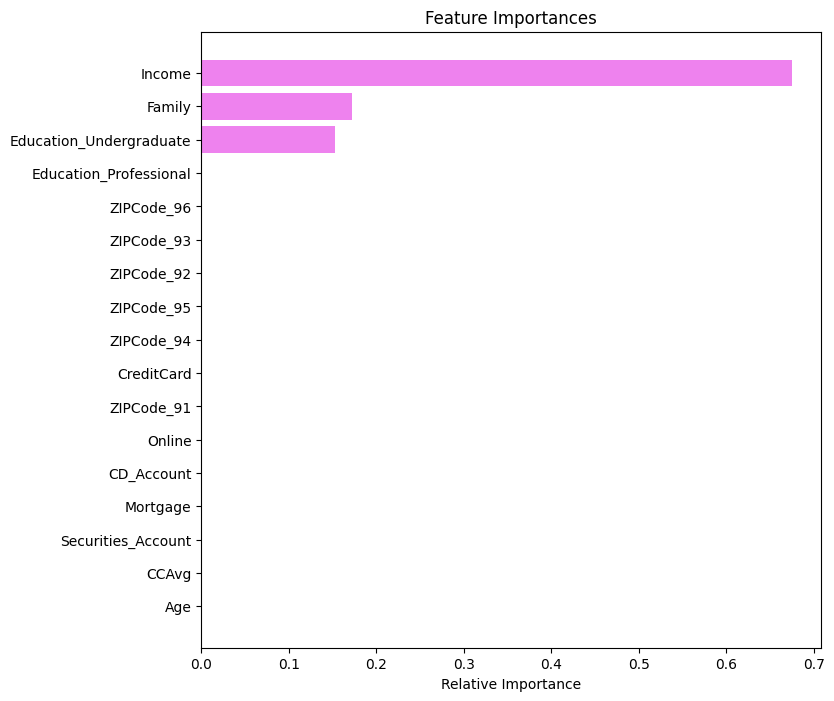

In [382]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator_2.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)
importances = estimator_2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

,Accuracy,Recall,Precision,F1
0,0.984,0.90604,0.931034,0.918367


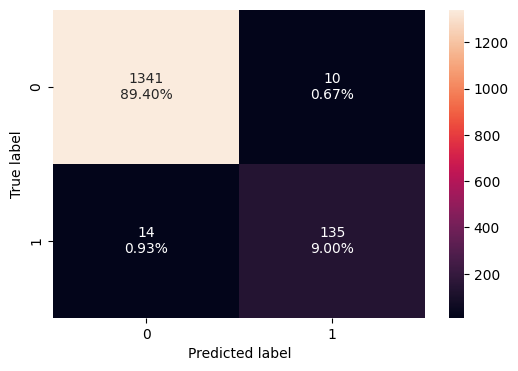

In [383]:
# Checking performance on test data
confusion_matrix_sklearn(model2, X_test, y_test)
decision_tree_tune_post_test = model_performance_classification_sklearn(model2, X_test, y_test)
decision_tree_tune_post_test

## Model Performance Comparison and Final Model Selection

In [384]:
# training performance comparison

models_train_comp_df = pd.concat(
    [decision_tree_perf_train.T, decision_tree_tune_perf_train.T, decision_tree_tune_post_train.T], axis=1,
)
models_train_comp_df.columns = ["Decision Tree (sklearn default)", "Decision Tree (Pre-Pruning)", "Decision Tree (Post-Pruning)"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree (sklearn default),Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.0,0.790286,0.993143
Recall,1.0,1.000000,0.963746
Precision,1.0,0.310798,0.963746
F1,1.0,0.474212,0.963746


In [385]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [decision_tree_perf_test.T, decision_tree_tune_perf_test.T, decision_tree_tune_post_test.T], axis=1,
)
models_test_comp_df.columns = ["Decision Tree (sklearn default)", "Decision Tree (Pre-Pruning)", "Decision Tree (Post-Pruning)"]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Decision Tree (sklearn default),Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.981333,0.956667,0.984000
Recall,0.899329,0.959732,0.906040
Precision,0.911565,0.707921,0.931034
F1,0.905405,0.814815,0.918367


## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

**Conclusion:**
* Overall, we have implemented 3 trees/models using DecisionTreeClassifier: the default tree, pre-pruned tree, and post-pruned tree.

1.  The **Default Scikit-Learn tree** has 100% accuracy, precision, etc. for the training dataset, but has approx. 90% accuracy, precision, recall, and F1 for the testing dataset. This indicates that the model is doing very good on training data, but bad on testing data, which means there is overfitting on the training data.

2.   The **Decision Tree (Pre-Pruning)** performs perfectly on the training set with a recall score of 100%, but its recall score on the test set is around 96%, indicating some overfitting on the training data.

3. The **Decision Tree (Post-Pruning)** has 99% accuracy on the training set, and 98% accuracy on the testing set. In fact, most of the performance metrics are very similar/comparable/good for both training and testing dataset. This means that **the post-pruned tree has solved the overfitting problem on the training set.**


* Also, let us see what are the important variables/features based on gini importance/best split in Decision trees?
    * The **most important features** for decision-making are **Income, Family, Undergrad Education**, Prof. Education, CCAvg, and then other variables.

* Recommendations:
  * Keep continuing the progress made so far!!
  * Focus on the above important features: income, family, undergrads, professors, and credit-card average. We want to expand to multiple families (1 person to 4 people), multiple educations (undergrads, grads, and professors), and increase the other features as well.
  
* Customers prefer:
  * Quick and digital transaction processes: through online and mobile banking platforms.

  * Low interest rates on savings and investment accounts

  * Clear financial terms and conditions

  * Personalized User Experiences

  * Responsive Customer Service: helpful customer service, whether through phone, chat, or in-person.

___